In [711]:
# Import packages needed for the project

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime as dt
from statsmodels.tsa.stattools import adfuller
import plotly.offline as pyoff
import plotly.graph_objs as go
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# matplotlib style & parameter changes
import matplotlib
matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (16, 7)

#Importing complete wind and solar energy  data for 2015- 2021 Germany
[Link of data set](https://data.open-power-system-data.org/time_series/2020-10-06)

In [712]:
dataframe = pd.read_csv("time_series_60min_singleindex_filtered.csv", parse_dates=[0], index_col=0)

In [713]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17568 entries, 2014-12-31 23:00:00+00:00 to 2017-01-01 22:00:00+00:00
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cet_cest_timestamp                    17568 non-null  object 
 1   DE_load_actual_entsoe_transparency    17567 non-null  float64
 2   DE_load_forecast_entsoe_transparency  17567 non-null  float64
 3   DE_solar_capacity                     17568 non-null  int64  
 4   DE_solar_generation_actual            17464 non-null  float64
 5   DE_solar_profile                      17464 non-null  float64
 6   DE_wind_capacity                      17568 non-null  int64  
 7   DE_wind_generation_actual             17493 non-null  float64
 8   DE_wind_profile                       17493 non-null  float64
 9   DE_wind_offshore_capacity             17568 non-null  int64  
 10  DE_wind_offshore_generation_actual 

#display rows which have null values in "wind generation actual"

In [714]:

dataframe[dataframe['DE_wind_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,37248,NaN,NaN,27913,NaN,NaN,667,NaN,NaN,27246,NaN,NaN
2016-05-31 21:00:00+00:00,2016-05-31T23:00:00+0200,49286.0,47884.0,38989,NaN,NaN,34217,NaN,NaN,2275,NaN,NaN,31942,NaN,NaN
2016-05-31 22:00:00+00:00,2016-06-01T00:00:00+0200,45570.0,44767.0,38991,NaN,NaN,34238,NaN,NaN,2275,NaN,NaN,31963,NaN,NaN
2016-05-31 23:00:00+00:00,2016-06-01T01:00:00+0200,43906.0,42865.0,38991,NaN,NaN,34238,NaN,NaN,2275,NaN,NaN,31963,NaN,NaN
2016-06-01 00:00:00+00:00,2016-06-01T02:00:00+0200,43059.0,41763.0,38991,NaN,NaN,34238,NaN,NaN,2275,NaN,NaN,31963,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-09 18:00:00+00:00,2016-12-09T19:00:00+0100,67805.0,68936.0,39699,NaN,NaN,36538,NaN,NaN,2558,NaN,NaN,33980,NaN,NaN
2016-12-09 19:00:00+00:00,2016-12-09T20:00:00+0100,63626.0,65169.0,39699,NaN,NaN,36538,NaN,NaN,2558,NaN,NaN,33980,NaN,NaN
2016-12-09 20:00:00+00:00,2016-12-09T21:00:00+0100,59988.0,61899.0,39699,NaN,NaN,36538,NaN,NaN,2558,NaN,NaN,33980,NaN,NaN


#display rows which have null values in "solar generation actual"

In [715]:
dataframe[dataframe['DE_solar_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,37248,NaN,NaN,27913,NaN,NaN,667,NaN,NaN,27246,NaN,NaN
2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,41151.0,39723.0,37248,NaN,NaN,27913,8852.0,0.3171,667,517.0,0.7744,27246,8336.0,0.3059
2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,40135.0,38813.0,37248,NaN,NaN,27913,9054.0,0.3244,667,514.0,0.7710,27246,8540.0,0.3134
2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,39106.0,38490.0,37248,NaN,NaN,27913,9070.0,0.3249,667,518.0,0.7761,27246,8552.0,0.3139
2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,38765.0,38644.0,37248,NaN,NaN,27913,9163.0,0.3283,667,520.0,0.7793,27246,8643.0,0.3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-09 18:00:00+00:00,2016-12-09T19:00:00+0100,67805.0,68936.0,39699,NaN,NaN,36538,NaN,NaN,2558,NaN,NaN,33980,NaN,NaN
2016-12-09 19:00:00+00:00,2016-12-09T20:00:00+0100,63626.0,65169.0,39699,NaN,NaN,36538,NaN,NaN,2558,NaN,NaN,33980,NaN,NaN
2016-12-09 20:00:00+00:00,2016-12-09T21:00:00+0100,59988.0,61899.0,39699,NaN,NaN,36538,NaN,NaN,2558,NaN,NaN,33980,NaN,NaN


##75 null values for wind_gen_actual
##104 null values for solar_gen_actual

In [716]:
dataframe.isna().sum()

,0
cet_cest_timestamp,0
DE_load_actual_entsoe_transparency,1
DE_load_forecast_entsoe_transparency,1
DE_solar_capacity,0
DE_solar_generation_actual,104
DE_solar_profile,104
DE_wind_capacity,0
DE_wind_generation_actual,75
DE_wind_profile,75
DE_wind_offshore_capacity,0


####Filling null values from the values of the day before

In [717]:
nulls = dataframe.isna().any(axis=1)
dataframe.loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']] = dataframe.shift(24).loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']]

#shift function to shift the index 24 hours

####Rechecking the null values (whatever left)

In [718]:
dataframe[dataframe['DE_solar_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,None,NaN,NaN,37248,NaN,NaN,27913,NaN,NaN,667,NaN,NaN,27246,NaN,NaN
2015-01-01 00:00:00+00:00,None,41151.0,39723.0,37248,NaN,NaN,27913,8852.0,0.3171,667,517.0,0.7744,27246,8336.0,0.3059
2015-01-01 01:00:00+00:00,None,40135.0,38813.0,37248,NaN,NaN,27913,9054.0,0.3244,667,514.0,0.7710,27246,8540.0,0.3134
2015-01-01 02:00:00+00:00,None,39106.0,38490.0,37248,NaN,NaN,27913,9070.0,0.3249,667,518.0,0.7761,27246,8552.0,0.3139
2015-01-01 03:00:00+00:00,None,38765.0,38644.0,37248,NaN,NaN,27913,9163.0,0.3283,667,520.0,0.7793,27246,8643.0,0.3172
2015-01-01 04:00:00+00:00,None,38941.0,38773.0,37248,NaN,NaN,27913,9231.0,0.3307,667,520.0,0.7790,27246,8712.0,0.3197
2015-01-01 05:00:00+00:00,None,39045.0,37247.0,37248,NaN,NaN,27913,9689.0,0.3471,667,521.0,0.7815,27246,9167.0,0.3365
2015-01-01 06:00:00+00:00,None,40206.0,40371.0,37248,NaN,NaN,27913,10331.0,0.3701,667,520.0,0.7801,27246,9811.0,0.3601


Observation: The only null values remaining are those from the first day, as all other null values were filled using data from the previous day.

In [719]:
#fill in the rest to zero because that is what they would be at those hours of night till 6 am
dataframe['DE_solar_generation_actual'].fillna(0, inplace = True)
dataframe['cet_cest_timestamp'].fillna(0, inplace = True)

####Doing the same thing for wind energy

In [720]:
nulls = dataframe.isna().any(axis=1)
dataframe.loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']] = dataframe.shift(24).loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']]

# Identify rows with any null values across columns (axis=1) and store the result in 'nulls'
# For those rows with null values, fill the 'DE_wind_generation_actual' and 'cet_cest_timestamp' columns
# by shifting the corresponding values from the same columns 24 hours earlier (using df.shift(24))


####Replacing the null values (whatever left) by mean



In [721]:
dataframe[dataframe['DE_wind_generation_actual'].isna()]
# Filter and return the rows from the dataframe where the 'DE_wind_generation_actual' column has null (NaN) values


,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,None,NaN,NaN,37248,0.0,NaN,27913,NaN,NaN,667,NaN,NaN,27246,NaN,NaN
2015-01-01 00:00:00+00:00,None,41151.0,39723.0,37248,0.0,NaN,27913,NaN,0.3171,667,517.0,0.7744,27246,8336.0,0.3059
2015-01-01 01:00:00+00:00,None,40135.0,38813.0,37248,0.0,NaN,27913,NaN,0.3244,667,514.0,0.7710,27246,8540.0,0.3134
2015-01-01 02:00:00+00:00,None,39106.0,38490.0,37248,0.0,NaN,27913,NaN,0.3249,667,518.0,0.7761,27246,8552.0,0.3139
2015-01-01 03:00:00+00:00,None,38765.0,38644.0,37248,0.0,NaN,27913,NaN,0.3283,667,520.0,0.7793,27246,8643.0,0.3172
2015-01-01 04:00:00+00:00,None,38941.0,38773.0,37248,0.0,NaN,27913,NaN,0.3307,667,520.0,0.7790,27246,8712.0,0.3197
2015-01-01 05:00:00+00:00,None,39045.0,37247.0,37248,0.0,NaN,27913,NaN,0.3471,667,521.0,0.7815,27246,9167.0,0.3365
2015-01-01 06:00:00+00:00,None,40206.0,40371.0,37248,0.0,NaN,27913,NaN,0.3701,667,520.0,0.7801,27246,9811.0,0.3601


In [722]:
dataframe['DE_wind_generation_actual'].mean()
# Calculate and return the mean (average) value of the 'DE_wind_generation_actual' column in the dataframe
# It automatically excludes NaN values while computing the mean


8776.849772209567

In [723]:
dataframe['DE_wind_generation_actual'].fillna(10860, inplace=True)
# Replace all the null (NaN) values in the 'DE_wind_generation_actual' column with the value 11,556
# The 'inplace=True' ensures that the changes are made directly to the original dataframe without needing to reassign it


In [724]:
dataframe.isna().sum()

,0
cet_cest_timestamp,8
DE_load_actual_entsoe_transparency,1
DE_load_forecast_entsoe_transparency,1
DE_solar_capacity,0
DE_solar_generation_actual,0
DE_solar_profile,104
DE_wind_capacity,0
DE_wind_generation_actual,0
DE_wind_profile,75
DE_wind_offshore_capacity,0


#HEAT MAP TO CHECK CORRELATIONS BETWEEN FEATURES

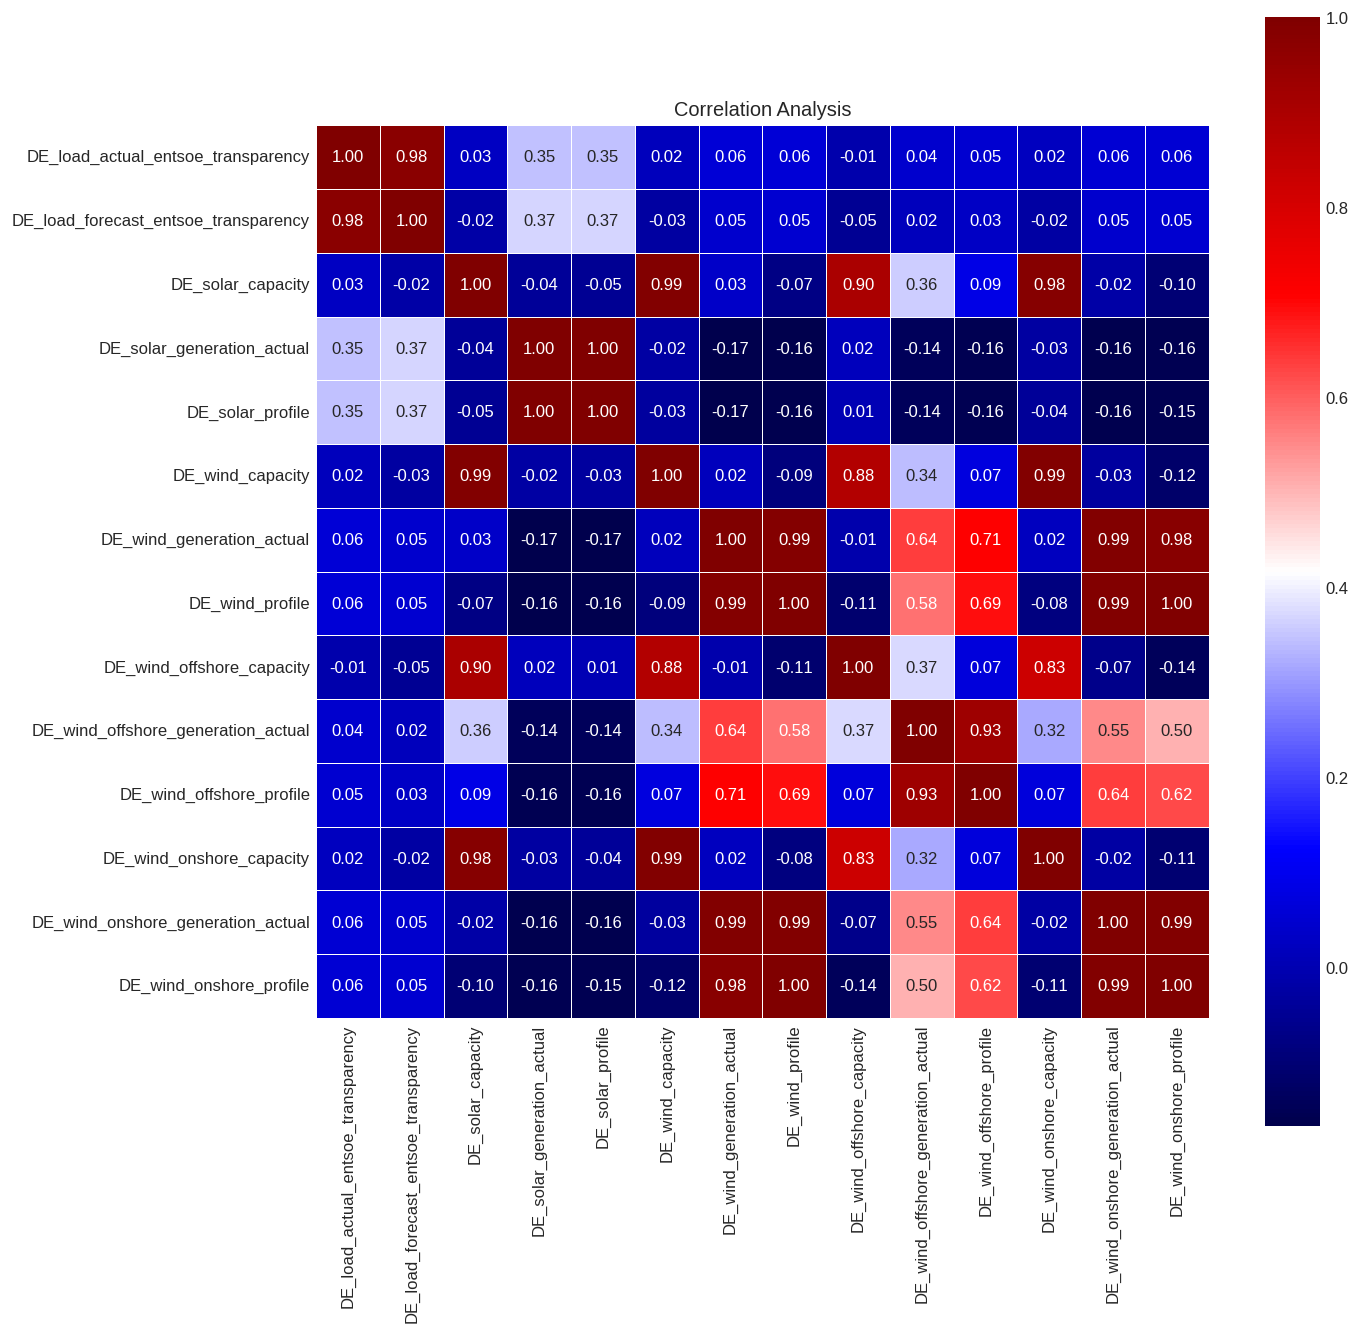

In [725]:
# Select only numeric columns for the correlation calculation
numeric_df = dataframe.select_dtypes(include=[np.number])

# Create a figure and a set of subplots with a size of 12x12 inches
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Generate a heatmap using seaborn to visualize the correlation matrix of the numeric dataframe
sns.heatmap(
    data=numeric_df.corr(),   # Compute the correlation matrix of the numeric dataframe
    annot=True,              # Display the correlation values directly on the heatmap
    annot_kws={"size": 10},  # Set the annotation text size
    square=True,             # Ensure that each cell in the heatmap is square-shaped
    cmap='seismic',          # Use the 'seismic' color palette to represent correlations (blue to red gradient)
    fmt='.2f',               # Format the correlation values to two decimal places
    linewidths=0.5,          # Set the width of lines between heatmap cells
    linecolor='w',           # Set the line color between cells to white
    ax=ax                    # Specify the axis to plot the heatmap on
)

# Add a title to the heatmap for context
plt.title('Correlation Analysis')

# Display the heatmap
plt.show()


solar_generation_actual depends most on solar_profile

wind_generation-actual depends most on wind_profile, wind_onshore_profile, wind_onshore_generation and  then on wind_offshore_profile and wind_offshore_generation

#dataset with timestamps as features (used later for time series forecasting models)

In [726]:
# Create a new DataFrame named 'modified' that contains only the 'cet_cest_timestamp',
# 'DE_solar_generation_actual', and 'DE_wind_generation_actual' columns from the original 'dataframe'.
# This subset is likely for focusing on time-based solar and wind generation data.
modified = dataframe[['cet_cest_timestamp', 'DE_solar_generation_actual', 'DE_wind_generation_actual']]
modified


,cet_cest_timestamp,DE_solar_generation_actual,DE_wind_generation_actual
utc_timestamp,,,
2014-12-31 23:00:00+00:00,None,0.0,10860.0
2015-01-01 00:00:00+00:00,None,0.0,10860.0
2015-01-01 01:00:00+00:00,None,0.0,10860.0
2015-01-01 02:00:00+00:00,None,0.0,10860.0
2015-01-01 03:00:00+00:00,None,0.0,10860.0
...,...,...,...
2017-01-01 18:00:00+00:00,2017-01-01T19:00:00+0100,0.0,10227.0
2017-01-01 19:00:00+00:00,2017-01-01T20:00:00+0100,0.0,11094.0
2017-01-01 20:00:00+00:00,2017-01-01T21:00:00+0100,0.0,11534.0


In [727]:
#modified dataset
# energy_all = pd.read_csv("time_series_60min_singleindex_filtered (3).csv",
#                         parse_dates=[0], index_col=0)

The remaining null values are only from the first day since we filled all other missing values using data from the previous day. This process also caused the dummy column, `cet_cest_timestamp`, to have nulls in the same positions. That's why I used it as a placeholder column.

In [728]:
# Drop the column becasue we do not need another time column
modified.drop(columns='cet_cest_timestamp',inplace=True)


# EDA

##Histograms for solar_generation_actual and wind_generation_actual

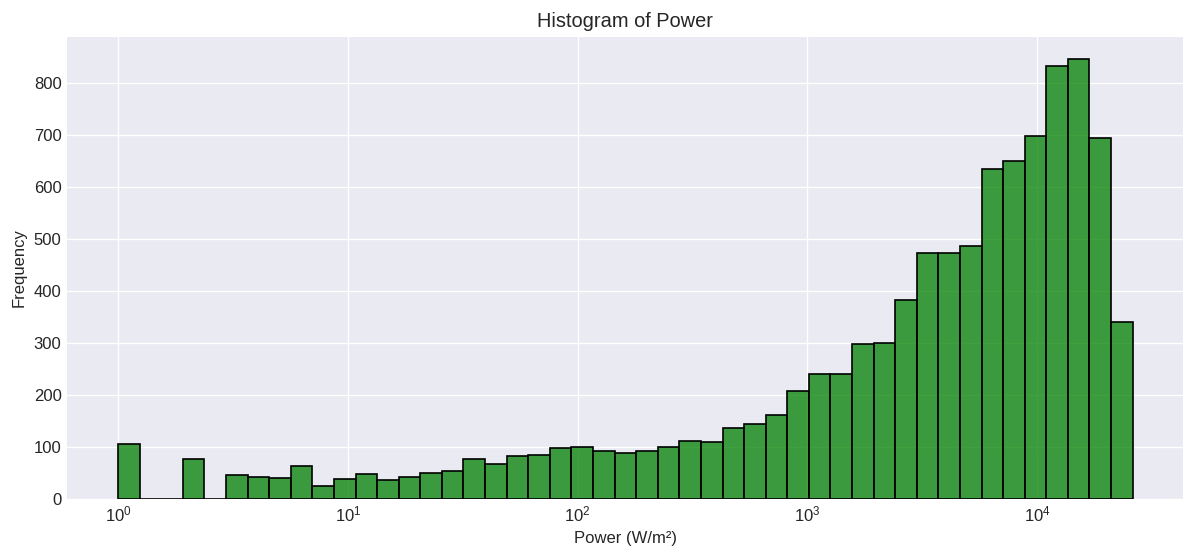

In [729]:
# Create a histogram to analyze the distribution of 'DE_solar_generation_actual' values
# Exclude zero values from the histogram for a clearer view of non-zero data points
plt.figure(figsize=(12, 5))  # Set the figure size for better visualization
sns.histplot(dataframe[dataframe['DE_solar_generation_actual'] != 0].DE_solar_generation_actual,color='green', log_scale=(True, False))  # Set the x-axis to a logarithmic scale
plt.title('Histogram of Power')  # Set the title of the plot
plt.xlabel('Power (W/m²)')  # Label the x-axis as 'Power' with units in W/m²
plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'
plt.show()  # Display the plot


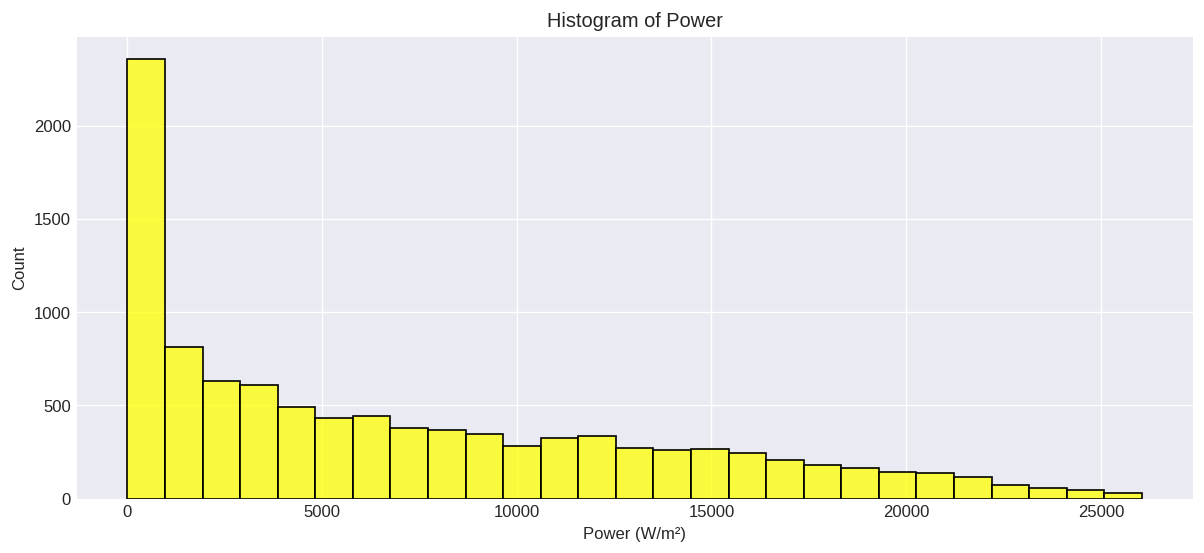

In [730]:
# Create a histogram to analyze the distribution of 'DE_solar_generation_actual' values
# Exclude zero values from the histogram for a clearer view of non-zero data points
plt.figure(figsize=(12, 5))  # Set the figure size for better visualization
sns.histplot(dataframe[dataframe['DE_solar_generation_actual'] != 0].DE_solar_generation_actual,color='yellow')  # Plot the histogram of non-zero solar generation values
plt.title('Histogram of Power')  # Set the title of the plot
plt.xlabel('Power (W/m²)')  # Label the x-axis as 'Power' with units in W/m²
plt.show()  # Display the plot


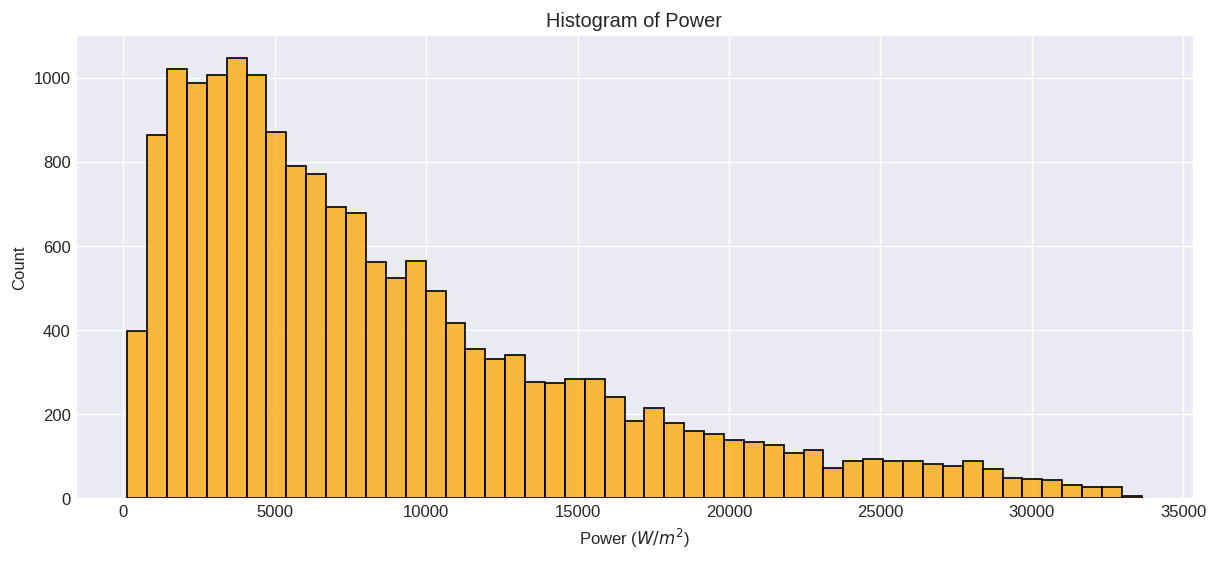

In [731]:
# Set the figure size for better visualization
plt.figure(figsize=(12, 5))

# Create a histogram to analyze the distribution of 'DE_wind_generation_actual' values
# Exclude zero values from the histogram for a clearer view of non-zero data points
sns.histplot(dataframe[dataframe['DE_wind_generation_actual'] != 0].DE_wind_generation_actual, color='orange')

# Set the title of the plot
plt.title('Histogram of Power')

# Label the x-axis as 'Power' with units in W/m²
plt.xlabel('Power ($W/m^2$)')

# Display the plot
plt.show()


In [732]:
# We will create a new data frame so that we can make the appropriate boxplots.
# Reset the index of the 'modified' DataFrame and store it in a new variable 'DE_energy'
# This will turn the current index into a regular column and create a new integer index
DE_energy = modified.reset_index()

# Display a summary of the DataFrame, including the number of entries, column data types, and non-null counts
DE_energy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   utc_timestamp               17568 non-null  datetime64[ns, UTC]
 1   DE_solar_generation_actual  17568 non-null  float64            
 2   DE_wind_generation_actual   17568 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 411.9 KB


In [733]:
# Convert 'utc_timestamp' to a datetime object and format it as 'YYYY-MM-DD HH:MM:SS'
DE_energy['utc_timestamp'] = pd.to_datetime(DE_energy['utc_timestamp']).apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))

# Ensure 'utc_timestamp' is in datetime format again (if needed after the previous operation)
DE_energy['utc_timestamp'] = pd.to_datetime(DE_energy['utc_timestamp'])

# Extract the hour from 'utc_timestamp' and create a new column 'hour'
DE_energy['hour'] = DE_energy['utc_timestamp'].dt.hour


## boxplot of energy output vs the hour at which recorded (useful for time series forecast)

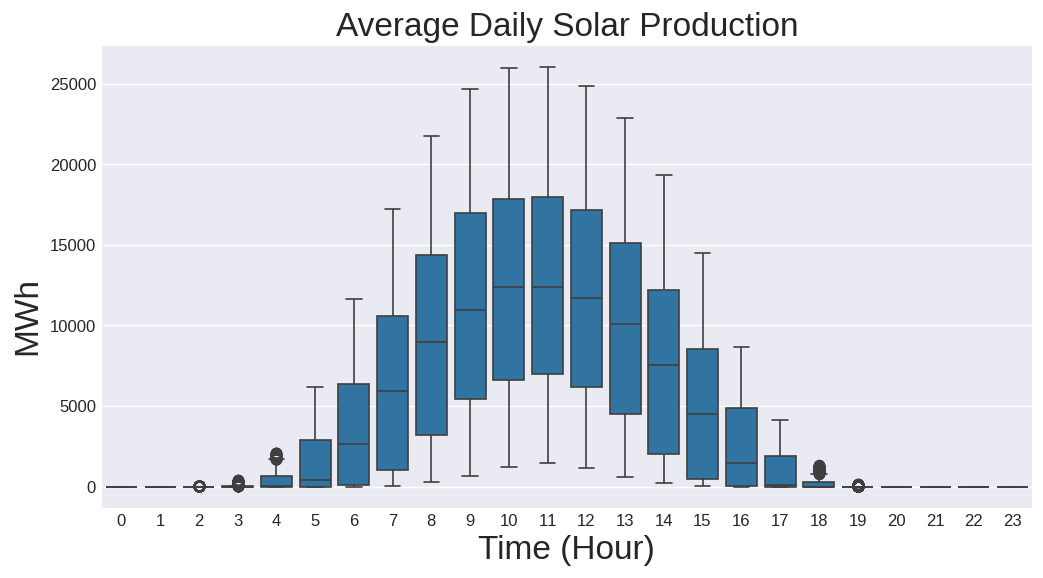

In [734]:
# Create a boxplot to visualize the average solar generation production by hour
plt.figure(figsize=(10, 5))  # Set the figure size for the plot
# Create the boxplot with hour on the x-axis and solar generation on the y-axis
sns.boxplot(x='hour', y='DE_solar_generation_actual', data=DE_energy)  # Use keyword arguments for better clarity

# Set the title of the boxplot
plt.title('Average Daily Solar Production', fontsize=20)

# Label the x-axis to indicate it represents time in hours
plt.xlabel('Time (Hour)', fontsize=20)

# Label the y-axis to indicate the measurement in MWh and adjust rotation and alignment
plt.ylabel("MWh", rotation='vertical', ha='right', fontsize=20)

# Display the plot
plt.show()


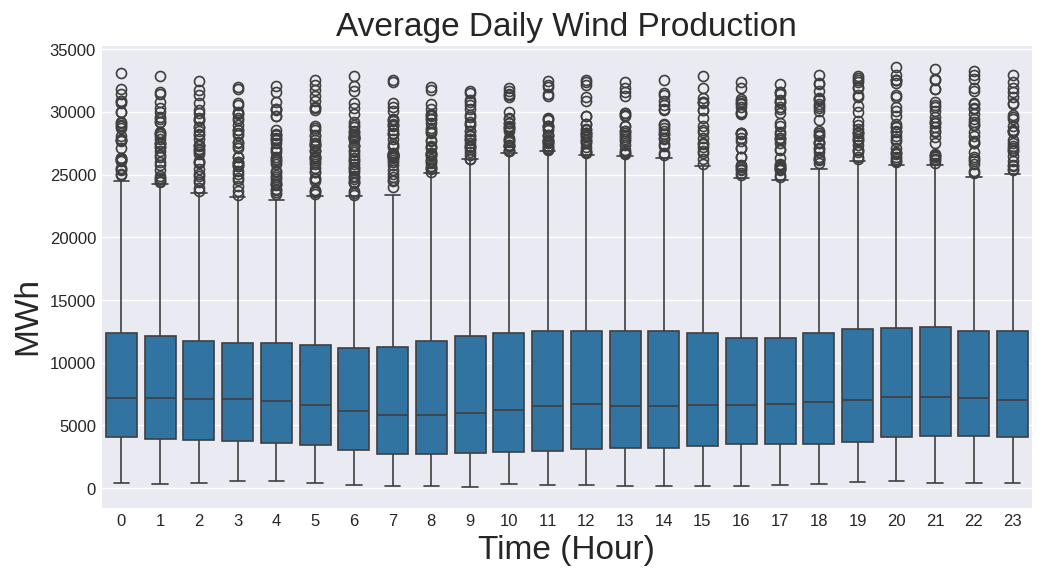

In [735]:
# Let's repeat the process for wind energy production

plt.figure(figsize=(10, 5))  # Set the figure size for the plot
# Create a boxplot with hour on the x-axis and wind generation on the y-axis
sns.boxplot(x='hour', y='DE_wind_generation_actual', data=DE_energy)  # Use keyword arguments for clarity

# Set the title of the boxplot
plt.title('Average Daily Wind Production', fontsize=20)

# Label the x-axis to indicate it represents time in hours
plt.xlabel('Time (Hour)', fontsize=20)

# Label the y-axis to indicate the measurement in MWh and adjust rotation and alignment
plt.ylabel("MWh", rotation='vertical', ha='right', fontsize=20)

# Display the plot
plt.show()


Wind generation shows less variation throughout the day compared to solar energy. Although the time of day influences wind speed due to rising surface temperatures, this effect is not evident in the current plot.

To improve the time series analysis and reduce noise, we can calculate the mean across all days.

In [736]:
# use the resample function to average the generation over all the days
modified = modified.resample('D').mean()
modified

,DE_solar_generation_actual,DE_wind_generation_actual
utc_timestamp,,
2014-12-31 00:00:00+00:00,0.000000,10860.000000
2015-01-01 00:00:00+00:00,712.416667,13991.458333
2015-01-02 00:00:00+00:00,323.208333,25148.083333
2015-01-03 00:00:00+00:00,301.541667,19289.791667
2015-01-04 00:00:00+00:00,832.583333,16042.625000
...,...,...
2016-12-28 00:00:00+00:00,810.333333,8957.791667
2016-12-29 00:00:00+00:00,1787.916667,6987.458333
2016-12-30 00:00:00+00:00,2022.750000,9968.875000


In [737]:
modified.shape

(733, 2)

#time series plot for energy averged over all days

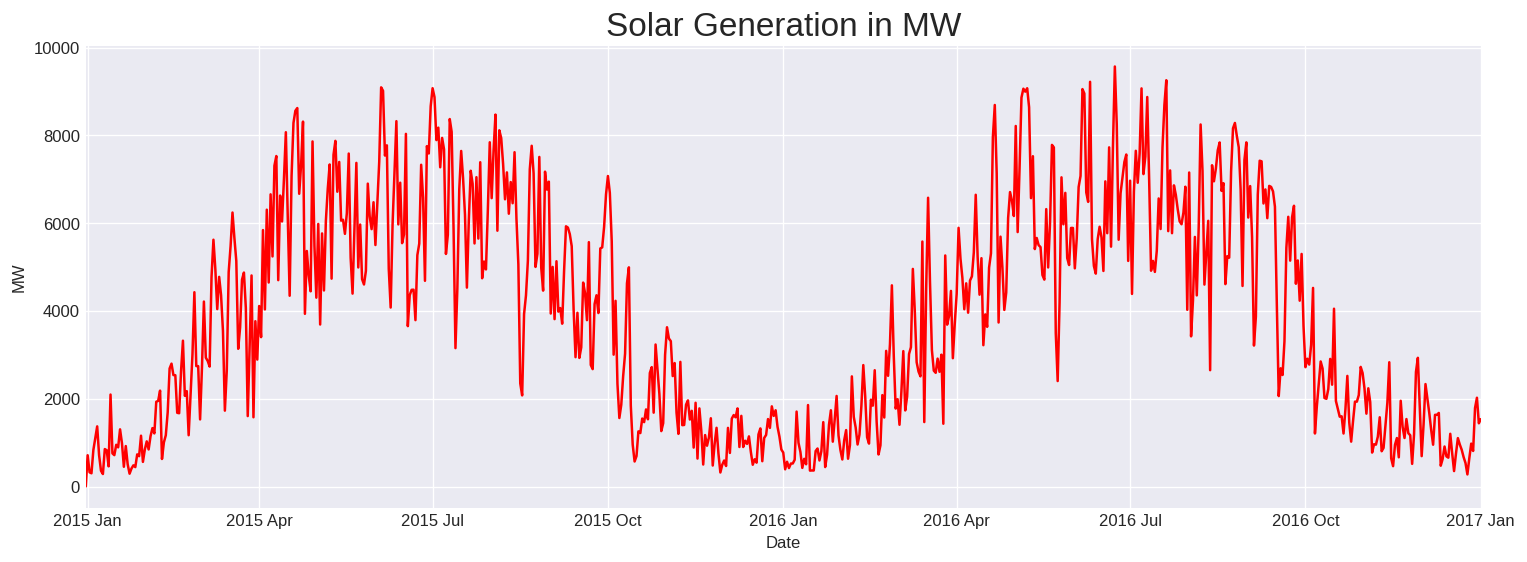

In [738]:
# visualize the time series of solar generation

plt.figure(figsize=(15, 5))  # Set figure size for better visualization
plt.plot(modified['DE_solar_generation_actual'],c='red')  # Plot the time series of solar generation
plt.title('Solar Generation in MW', fontsize=20)  # Add a title with proper fontsize
plt.ylabel('MW')  # Set the y-axis label to MW (megawatts)
plt.xlabel('Date')  # Set the x-axis label to Date
ax = plt.gca()  # Get the current axes for further formatting

# Adjust the x-axis for better date scaling and format the dates
ax.autoscale(enable=True, axis='x', tight=True)  # Autoscale the x-axis tightly
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))  # Format the x-axis to show Year and Month

plt.show()  # Display the plot


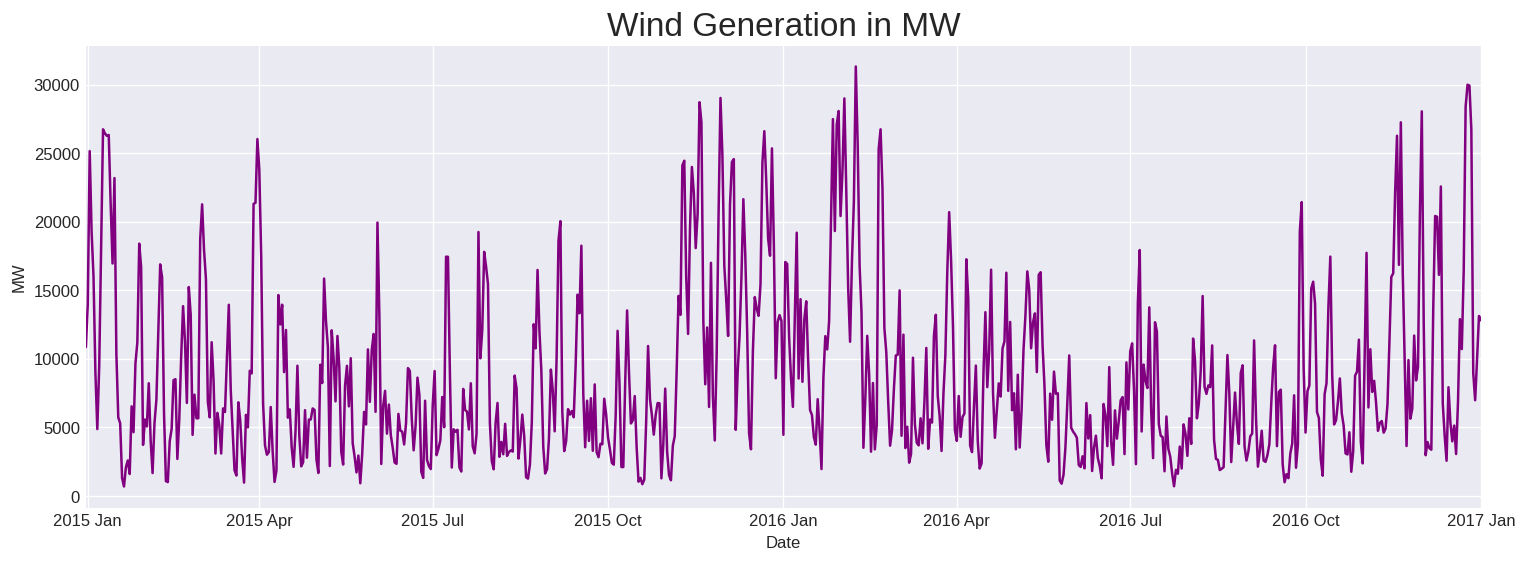

In [739]:
# Visualize the time series of wind generation

plt.figure(figsize=(15, 5))  # Set figure size for better visualization
plt.plot(modified['DE_wind_generation_actual'], c='purple')  # Plot the time series with purple color for wind generation
plt.title('Wind Generation in MW', fontsize=20)  # Add title with proper fontsize
plt.ylabel('MW')  # Set the y-axis label to MW (megawatts)
plt.xlabel('Date')  # Set the x-axis label to Date
ax = plt.gca()  # Get the current axes for further formatting

# Adjust the x-axis for better date scaling and format the dates
ax.autoscale(enable=True, axis='x', tight=True)  # Autoscale the x-axis tightly
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))  # Format the x-axis to show Year and Month

plt.show()  # Display the plot


In [740]:
# Lets check out some basic statistics for the data
modified.describe()

,DE_solar_generation_actual,DE_wind_generation_actual
count,733.000000,733.000000
mean,3950.678115,8780.750143
std,2523.331864,6454.572141
min,0.000000,697.416667
25%,1555.250000,3881.583333
50%,3952.500000,6797.791667
75%,6042.375000,11765.833333
max,9571.250000,31318.875000


The mean for wind generation is significantly higher because wind produces considerably more electricity than solar in Germany. Both sources also exhibit very high standard deviations.

#MACHINE LEARNING ALOGORITHMS

##Train-Test-Split

In [741]:
dataframe.head()

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,None,NaN,NaN,37248,0.0,NaN,27913,10860.0,NaN,667,NaN,NaN,27246,NaN,NaN
2015-01-01 00:00:00+00:00,None,41151.0,39723.0,37248,0.0,NaN,27913,10860.0,0.3171,667,517.0,0.7744,27246,8336.0,0.3059
2015-01-01 01:00:00+00:00,None,40135.0,38813.0,37248,0.0,NaN,27913,10860.0,0.3244,667,514.0,0.7710,27246,8540.0,0.3134
2015-01-01 02:00:00+00:00,None,39106.0,38490.0,37248,0.0,NaN,27913,10860.0,0.3249,667,518.0,0.7761,27246,8552.0,0.3139
2015-01-01 03:00:00+00:00,None,38765.0,38644.0,37248,0.0,NaN,27913,10860.0,0.3283,667,520.0,0.7793,27246,8643.0,0.3172


In [742]:
# Replace any occurrences of positive or negative infinity in the dataframe with NaN (Not a Number) values.
# This ensures that extreme values are handled appropriately and can be addressed in further data processing steps.

dataframe.replace([np.inf, -np.inf], np.nan, inplace=True)

In [743]:
# Replace all NaN (Not a Number) values in the dataframe with 0.
# This is useful to avoid issues with missing values during analysis or model training.

dataframe.fillna(0, inplace=True)

In [744]:
# Splitting the dataset into training and testing sets for model training.
# 'DE_solar_profile' is the input feature (X) and 'DE_solar_generation_actual' is the target variable (y).
# 80% of the data is used for training, and 20% is used for testing (test_size = 0.2).
# random_state = None ensures that the split is randomized each time this code is run.

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(dataframe['DE_solar_profile'], dataframe['DE_solar_generation_actual'],test_size = 0.2, random_state = None)

In [745]:
# Reshaping the training and testing input data ('X1_train' and 'X1_test') into 2D arrays.
# This is required because some machine learning models expect the input features to be in a 2D format,
# where each row is a sample and each column represents a feature.
# The reshape(-1,1) transforms the 1D arrays into column vectors (2D arrays with one feature).

X1_train=np.array(X1_train).reshape(-1,1)
X1_test=np.array(X1_test).reshape(-1,1)

In [746]:
X1_train

array([[0.    ],
       [0.    ],
       [0.3975],
       ...,
       [0.    ],
       [0.0879],
       [0.1789]])

In [747]:
# Splitting the 'DE_wind_profile' as features (X2_train and X2_test) and 'DE_wind_generation_actual' as target (y2_train and y2_test)
# into training and testing sets.
# 'test_size=0.2' indicates that 20% of the data will be used for testing, while the remaining 80% will be used for training.
# 'random_state=None' ensures the split is random each time the code is run.

X2_train, X2_test, y2_train, y2_test = train_test_split(dataframe['DE_wind_profile'], dataframe['DE_wind_generation_actual'],test_size = 0.2, random_state = None)

In [748]:
# For Wind Energy
X2_train=np.array(X2_train).reshape(-1,1)
X2_test=np.array(X2_test).reshape(-1,1)

In [749]:
X2_train

array([[0.5631],
       [0.1859],
       [0.1071],
       ...,
       [0.2031],
       [0.1938],
       [0.1204]])

##Lasso Regression

In [750]:
dataframe.head()

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,0,0.0,0.0,37248,0.0,0.0,27913,10860.0,0.0000,667,0.0,0.0000,27246,0.0,0.0000
2015-01-01 00:00:00+00:00,0,41151.0,39723.0,37248,0.0,0.0,27913,10860.0,0.3171,667,517.0,0.7744,27246,8336.0,0.3059
2015-01-01 01:00:00+00:00,0,40135.0,38813.0,37248,0.0,0.0,27913,10860.0,0.3244,667,514.0,0.7710,27246,8540.0,0.3134
2015-01-01 02:00:00+00:00,0,39106.0,38490.0,37248,0.0,0.0,27913,10860.0,0.3249,667,518.0,0.7761,27246,8552.0,0.3139
2015-01-01 03:00:00+00:00,0,38765.0,38644.0,37248,0.0,0.0,27913,10860.0,0.3283,667,520.0,0.7793,27246,8643.0,0.3172


In [751]:
from sklearn.linear_model import Lasso

# Train the model
# Solar Energy
lasso = Lasso(alpha = 1)
lasso.fit(X1_train, y1_train)
y1_pred = lasso.predict(X1_test)
# Using the Lasso regression model to predict solar energy generation.
# 'alpha = 1' is the regularization parameter controlling the strength of regularization (higher value means stronger regularization).
# Fitting the model using the training data for solar energy ('X1_train' and 'y1_train').
# Then, using the trained model to predict solar energy generation on the test data ('X1_test').


In [752]:
#Wind energy
lasso = Lasso(alpha = 1)
lasso.fit(X2_train, y2_train)
y2_pred = lasso.predict(X2_test)
# Using the Lasso regression model to predict wind energy generation.
# Similar to the solar model, we set 'alpha = 1' for regularization strength.
# The model is trained using the wind energy training data ('X2_train' and 'y2_train').
# Once trained, the model is used to predict wind energy generation on the test data ('X2_test').


In [753]:
#Hyperparameter tuning - alpha = 2
lasso = Lasso(alpha = 2)
lasso.fit(X1_train, y1_train)
y1_pred2 = lasso.predict(X1_test)
r2 = r2_score(y1_test, y1_pred2)
print("Solar Accuracy:", r2)

Solar Accuracy: 0.9963455373732218


In [754]:
lasso = Lasso(alpha = 2)
lasso.fit(X2_train, y2_train)
y2_pred2 = lasso.predict(X2_test)

r2 = r2_score(y2_test, y2_pred2)
print("Wind Accuracy :", r2)

Wind Accuracy : 0.9674415206572649


###Evaluation Metrics

####Mean Squared Error

In [755]:
#alpha = 1
from sklearn.metrics import mean_squared_error
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred))
# Calculating the Mean Squared Error (MSE) for solar energy predictions.
# MSE is used to evaluate the performance of the Lasso regression model for solar energy.
# It measures the average squared difference between actual values ('y1_test') and predicted values ('y1_pred').


Solar MSE =  135481.9925505859


In [756]:
# Calculating the Mean Squared Error (MSE) for wind energy predictions.
# MSE evaluates the performance of the Lasso regression model for wind energy.
# It computes the average squared difference between actual values ('y2_test') and predicted values ('y2_pred').

print("Wind MSE = ",mean_squared_error(y2_test,y2_pred))

Wind MSE =  1596391.7382895858


In [757]:
#alpha = 2
# Printing the Mean Squared Error (MSE) for solar energy with Lasso regression (alpha = 2).
# This evaluates the model's performance with a stronger regularization parameter.

print("Solar MSE = ",mean_squared_error(y1_test,y1_pred2))

Solar MSE =  135537.03671927666


In [758]:
# Printing the Mean Squared Error (MSE) for wind energy with Lasso regression (alpha = 2).
# This checks how well the model predicts wind generation using a higher regularization factor.

print("Wind MSE = ",mean_squared_error(y2_test,y2_pred2))

Wind MSE =  1596842.015169217


####Mean Absolute Error

In [759]:
from sklearn.metrics import mean_absolute_error
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred))
# Calculating the Mean Absolute Error (MAE) for solar energy predictions.
# MAE provides a measure of the average absolute difference between predicted and actual values.


Solar MAE =  97.5596774207745


In [760]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred))
# Calculating the Mean Absolute Error (MAE) for wind energy predictions.
# MAE provides a measure of how much the predicted values for wind generation deviate from the actual values on average.


Wind MAE =  682.9004331598239


In [761]:
#alpha = 2
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred2))
# For alpha = 2, calculating the Mean Absolute Error (MAE) for the solar energy predictions.
# This will provide insight into the average deviation between predicted and actual solar generation values.


Solar MAE =  99.87537097254403


In [762]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred2))
# For alpha = 2, calculating the Mean Absolute Error (MAE) for the wind energy predictions.
# This will give an indication of the average absolute difference between the predicted and actual wind generation values.


Wind MAE =  684.0996867126638


####Root Mean Squared Error

In [763]:
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred)))
# Calculating the Root Mean Squared Error (RMSE) for the solar energy predictions.
# RMSE provides a metric that takes into account the magnitude of the error, giving a higher weight to larger errors.


Solar RMSE =  368.0787857926424


In [764]:
# Calculating the Root Mean Squared Error (RMSE) for the wind energy predictions.
# This metric helps evaluate the model by penalizing large errors more than smaller ones, giving insight into prediction accuracy.

print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  1263.483968354797


In [765]:
# Calculating the Root Mean Squared Error (RMSE) for the solar energy predictions with alpha set to 2.
# RMSE provides a measure of how well the model predicts the actual values, with larger errors having a greater impact.

print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

Solar RMSE =  368.15355046403755


In [766]:
# Calculating the Root Mean Squared Error (RMSE) for the wind energy predictions with the default alpha value.
# RMSE is used to assess the model's prediction accuracy, giving more weight to larger errors.

print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  1263.483968354797


####R Squared

In [767]:
from sklearn.metrics import r2_score

# Calculate the R² score for the solar energy predictions.
# R² score indicates how well the independent variable(s) explain the variance in the dependent variable.
# A higher R² value (closer to 1) indicates a better fit for the model.
r2_solar = r2_score(y1_test, y1_pred)
print("Solar R² = ", r2_solar)


Solar R² =  0.996347021520007


In [768]:
# Calculate the R² score for the wind energy predictions.
# This score measures the proportion of variance in the dependent variable (wind generation)
# that can be explained by the independent variable(s) (wind profile).
# A higher R² value (closer to 1) indicates a better fit for the model.
r2_wind = r2_score(y2_test, y2_pred)
print("Wind R² = ", r2_wind)


Wind R² =  0.9674507014843878


In [769]:
# Calculate the R² score for solar energy predictions with alpha set to 2.
# This score quantifies how well the model explains the variability in solar generation
# based on the solar profile. A value close to 1 indicates a good fit, while a value
# close to 0 indicates a poor fit.
r2_solar = r2_score(y1_test, y1_pred2)
print("Solar R² = ", r2_solar)


Solar R² =  0.9963455373732218


In [770]:
# Calculate the R² score for wind energy predictions with alpha set to 2.
# This score measures how effectively the model accounts for the variability in wind generation
# based on the wind profile. A higher value (close to 1) indicates a strong model fit,
# while a lower value (close to 0) suggests a weaker fit.
r2_wind = r2_score(y2_test, y2_pred2)
print("Wind R² = ", r2_wind)


Wind R² =  0.9674415206572649


###Plot

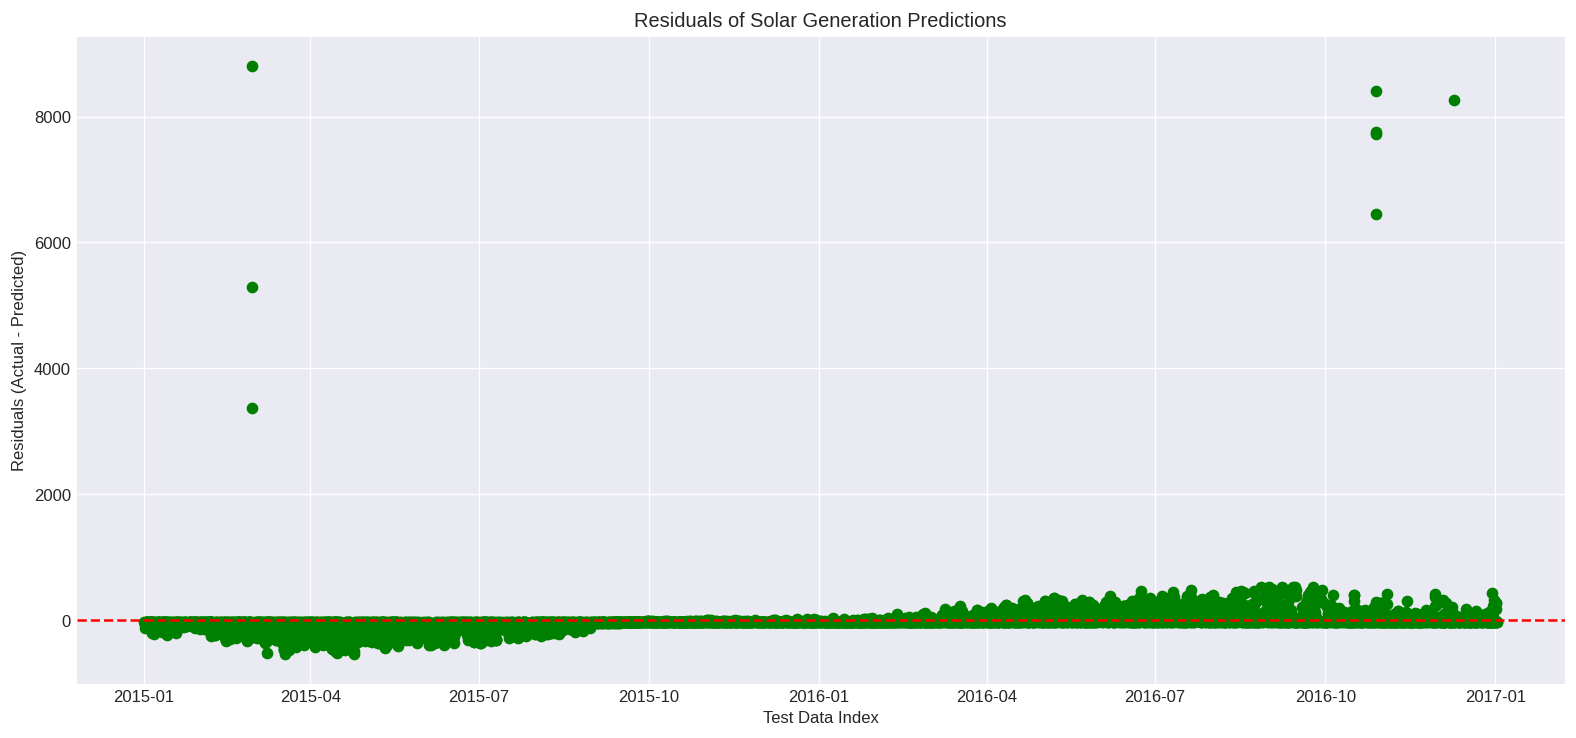

In [771]:
# Plot the residuals (the difference between actual and predicted solar generation values).
# This helps in visualizing how well the model's predictions match the actual data points.
# A scatter plot is used here, where the x-axis represents the index of the test data points,
# and the y-axis shows the residuals.

g = plt.plot(y1_test - y1_pred, marker='o', linestyle='',color='green')  # Create a scatter plot of residuals
plt.title('Residuals of Solar Generation Predictions')  # Title for the plot
plt.xlabel('Test Data Index')  # Label for the x-axis
plt.ylabel('Residuals (Actual - Predicted)')  # Label for the y-axis
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()  # Display the plot


#RIDGE REGRESSION

In [772]:
from sklearn.linear_model import Ridge  # Import the Ridge regression model from scikit-learn

# Initialize the Ridge regression model with a specified regularization strength (alpha).
ridgeSolar = Ridge(alpha=1)

# Train the Ridge regression model using the training data (X1_train and y1_train).
# This step adjusts the model parameters to minimize the error between predicted and actual values.
ridgeSolar.fit(X1_train, y1_train)

# Use the trained model to make predictions on the test set (X1_test).
# The predicted values for solar generation are stored in y1_pred.
y1_pred = ridgeSolar.predict(X1_test)


In [773]:
# Initialize the Ridge regression model for wind energy with a specified regularization strength (alpha).
ridgeWind = Ridge(alpha=1)

# Train the Ridge regression model using the training data for wind energy (X2_train and y2_train).
# This step adjusts the model parameters to minimize the error between predicted and actual values for wind generation.
ridgeWind.fit(X2_train, y2_train)

# Use the trained Ridge regression model to make predictions on the test set for wind energy (X2_test).
# The predicted values for wind generation are stored in y2_pred.
y2_pred = ridgeWind.predict(X2_test)  # Corrected to use ridgeWind instead of ridgeSolar


In [774]:
# Hyperparameter tuning - setting the regularization strength (alpha) to 2 for Ridge regression on solar energy.
ridgeSolar = Ridge(alpha=2)

# Fit the Ridge regression model using the training data for solar energy (X1_train and y1_train).
# This step adjusts the model parameters to minimize the error with the new alpha value.
ridgeSolar.fit(X1_train, y1_train)

# Use the trained Ridge regression model to make predictions on the test set for solar energy (X1_test).
# The predicted values for solar generation are stored in y1_pred2.
y1_pred2 = ridgeSolar.predict(X1_test)


In [775]:
# Hyperparameter tuning - setting the regularization strength (alpha) to 2 for Ridge regression on wind energy.
ridgeWind = Ridge(alpha=2)

# Fit the Ridge regression model using the training data for wind energy (X2_train and y2_train).
# This step adjusts the model parameters to minimize the error with the new alpha value.
ridgeWind.fit(X2_train, y2_train)

# Use the trained Ridge regression model to make predictions on the test set for wind energy (X2_test).
# The predicted values for wind generation are stored in y2_pred2.
y2_pred2 = ridgeWind.predict(X2_test)  # Corrected to use ridgeWind for predictions


##Evaluation Metrics

###Mean Squared Error

In [776]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE) for the solar energy predictions.
# MSE measures the average of the squares of the errors, which is the average squared difference between predicted and actual values.
print("Solar MSE = ", mean_squared_error(y1_test, y1_pred))


Solar MSE =  135628.8764825295


In [777]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE) for the wind energy predictions.
# MSE quantifies the average squared difference between the predicted and actual wind generation values.
print("Wind MSE = ", mean_squared_error(y2_test, y2_pred))


Wind MSE =  1596947.038020549


In [778]:
#alpha = 2
# Calculate the Mean Squared Error (MSE) for the solar energy predictions with a Ridge regression model using alpha = 2.
# This metric helps assess how well the model predicts solar generation compared to the actual values.
print("Solar MSE = ", mean_squared_error(y1_test, y1_pred2))


Solar MSE =  136362.76833221284


In [779]:
#alpha = 2
# Calculate the Mean Squared Error (MSE) for the wind energy predictions with a Ridge regression model using alpha = 2.
# This metric evaluates how accurately the model predicts wind generation compared to the actual values.
print("Wind MSE = ", mean_squared_error(y2_test, y2_pred2))


Wind MSE =  1598111.9471295285


###Mean Absolute Error

In [780]:
# Calculate the Mean Absolute Error (MAE) for the solar energy predictions using the Ridge regression model.
# This metric measures the average magnitude of errors in the predictions, giving an idea of how far off the predictions are from the actual values.
print("Solar MAE = ", mean_absolute_error(y1_test, y1_pred))


Solar MAE =  101.5840459159988


In [781]:
# Calculate the Mean Absolute Error (MAE) for the wind energy predictions using the Ridge regression model.
# MAE provides an average of the absolute differences between predicted and actual values, indicating the model's accuracy for wind energy predictions.
print("Wind MAE = ", mean_absolute_error(y2_test, y2_pred))


Wind MAE =  684.3662305728255


In [782]:
# Calculate the Mean Absolute Error (MAE) for the solar energy predictions using the Ridge regression model with alpha set to 2.
# MAE measures the average absolute differences between predicted and actual values, helping to evaluate the model's accuracy for solar energy predictions.
print("Solar MAE = ", mean_absolute_error(y1_test, y1_pred2))


Solar MAE =  108.35587134811672


In [783]:
# Calculate the Mean Absolute Error (MAE) for the wind energy predictions using the Ridge regression model with alpha set to 2.
# MAE indicates the average absolute differences between the predicted and actual values, providing insights into the model's accuracy for wind energy predictions.
print("Wind MAE = ", mean_absolute_error(y2_test, y2_pred2))


Wind MAE =  687.1027652112468


###Root Mean Squared Error

In [784]:
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred)))

Solar RMSE =  368.2782595844201


In [785]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  1263.703698665375


In [786]:
#alpha = 2
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

Solar RMSE =  369.2732976160243


In [787]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred2)))

Wind RMSE =  1264.164525340562


###R Squared

In [788]:
from sklearn.metrics import r2_score
r2_solar = r2_score(y1_test,y1_pred)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.9963430611129274


In [789]:
r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.9674393793156023


In [790]:
#alpha = 2
r2_solar = r2_score(y1_test,y1_pred2)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.9963232733087841


In [791]:
r2_wind = r2_score(y2_test,y2_pred2)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.9674156276427376


###Plot

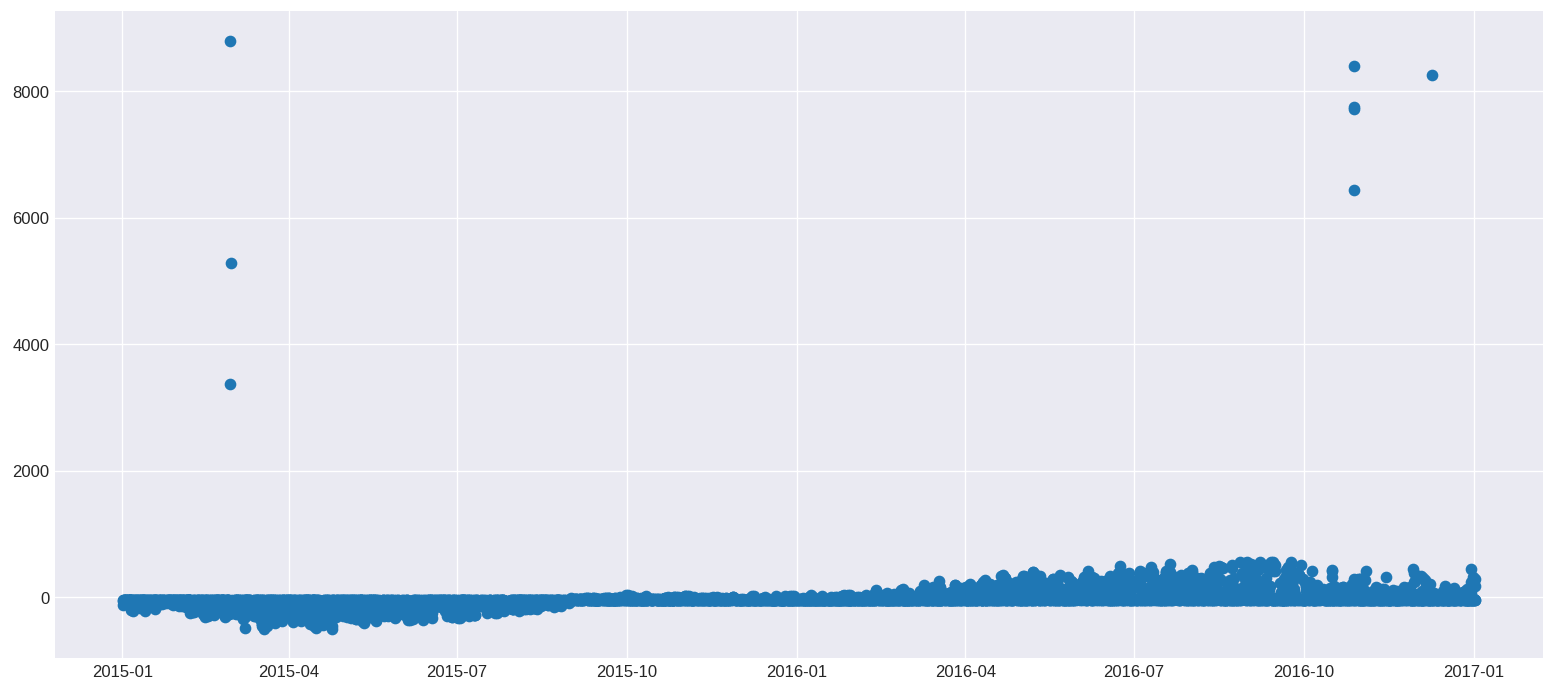

In [792]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

#DECISION TREE

In [793]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree regressor object with a specified random state for reproducibility.
# The random state ensures that the results can be replicated in future runs.
regressor = DecisionTreeRegressor(random_state=0)

# Fit the regressor to the training data (X1_train for features and y1_train for target values).
# This trains the model to learn the relationship between the solar profile and the actual solar generation.
regressor.fit(X1_train, y1_train)


DecisionTreeRegressor(random_state=0)

In [794]:
# Use the trained Decision Tree regressor to make predictions on the test set.
# The model will predict the solar generation based on the solar profile features in X1_test.
y1_pred = regressor.predict(X1_test)

# Print the actual values from the test set for comparison.
# This allows you to see the true solar generation values that correspond to the predictions.
y1_test
r2 = r2_score(y1_test, y1_pred)
print("R-squared Accuracy:", r2)

R-squared Accuracy: 0.9959755145542888


In [795]:
y1_pred

array([ 9654.        ,    37.76485623,  3250.5       , ...,
       15149.        ,    80.77777778, 10857.5       ])

In [796]:
#from sklearn.model_selection import cross_val_score
#cross_val_score(regressor, X1_train, y1_train, cv=50)

In [797]:
#for wind energy
regressor.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=0)

In [798]:
y2_pred = regressor.predict(X2_test)

# print the predicted price
y2_test

,DE_wind_generation_actual
utc_timestamp,
2016-09-23 02:00:00+00:00,2142.0
2016-03-02 21:00:00+00:00,9849.0
2015-02-14 11:00:00+00:00,1962.0
2015-03-29 15:00:00+00:00,16465.0
2016-08-29 18:00:00+00:00,6879.0
...,...
2016-11-27 06:00:00+00:00,11896.0
2016-11-22 05:00:00+00:00,14449.0
2016-09-08 05:00:00+00:00,5947.0


In [799]:
y2_pred

array([ 2042.28571429, 10382.        ,  2127.        , ...,
        5296.        ,  2160.66666667,  6178.        ])

In [800]:
#from sklearn.model_selection import cross_val_score
#cross_val_score(regressor, X2_train, y2_train, cv=50)

In [801]:
from sklearn.metrics import r2_score

In [802]:
print("Accuracy for solar: ",r2_score(y1_pred, y1_test))

Accuracy for solar:  0.9959718509748189


In [803]:
print("Accuracy for wind",r2_score(y2_pred, y2_test))

Accuracy for wind 0.9643262347993693


In [804]:
from sklearn.metrics import mean_absolute_error as mae

In [805]:
error = mae(y1_test, y1_pred)
print(error)

108.8428292328411


In [806]:
error = mae(y2_test, y2_pred)
print(error)

767.7429793380926


In [807]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE) between the actual values (y1_test) and the predicted values (y1_pred).
# MSE is a common metric used to evaluate the accuracy of regression models.
MSE = mean_squared_error(y1_test, y1_pred)

# Print the calculated MSE value to assess the model's performance.
print(MSE)


149260.47611887925


In [808]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE) for the wind generation predictions.
# MSE is used to quantify the difference between actual and predicted values, helping to evaluate the model's performance.
MSE = mean_squared_error(y2_test, y2_pred)

# Print the calculated MSE value for the wind generation model.
print(MSE)


1715528.2329922733


In [809]:
# Calculate the Root Mean Squared Error (RMSE) for the solar generation predictions.
# RMSE is a widely used metric to assess the accuracy of a model, indicating how much error is present in the predictions.
print("RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred)))


RMSE: 386.3424337538905


In [810]:
# Calculate the Root Mean Squared Error (RMSE) for the wind generation predictions.
# RMSE provides insight into the average magnitude of the errors in the predictions, helping to evaluate model performance.
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred)))


RMSE: 1309.7817501371262


Hyperparameter tuning with random state=1

In [811]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree regressor object with a fixed random state for reproducibility
regressor = DecisionTreeRegressor(random_state=1)

# Fit the regressor to the training data (X1_train as features and y1_train as target variable)
regressor.fit(X1_train, y1_train)


DecisionTreeRegressor(random_state=1)

In [812]:
y1_pred2 = regressor.predict(X1_test)

In [813]:
#for wind energy
regressor.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=1)

In [814]:
y2_pred2 = regressor.predict(X2_test)

In [815]:
r2_score(y1_pred2, y1_test)

0.9959718509748189

In [816]:
r2_score(y2_pred2, y2_test)

0.9643262347993693

In [817]:
MSE = mean_squared_error(y1_test, y1_pred2)
print(MSE)

149260.47611887925


In [818]:
MSE = mean_squared_error(y2_test, y2_pred2)
print(MSE)

1715528.2329922733


In [819]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

RMSE 386.3424337538905


In [820]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y2_test,y2_pred2)))

RMSE 1309.7817501371262


In [821]:
error = mae(y1_test, y1_pred2)
print(error)

108.8428292328411


In [822]:
error = mae(y2_test, y2_pred2)
print(error)

767.7429793380926


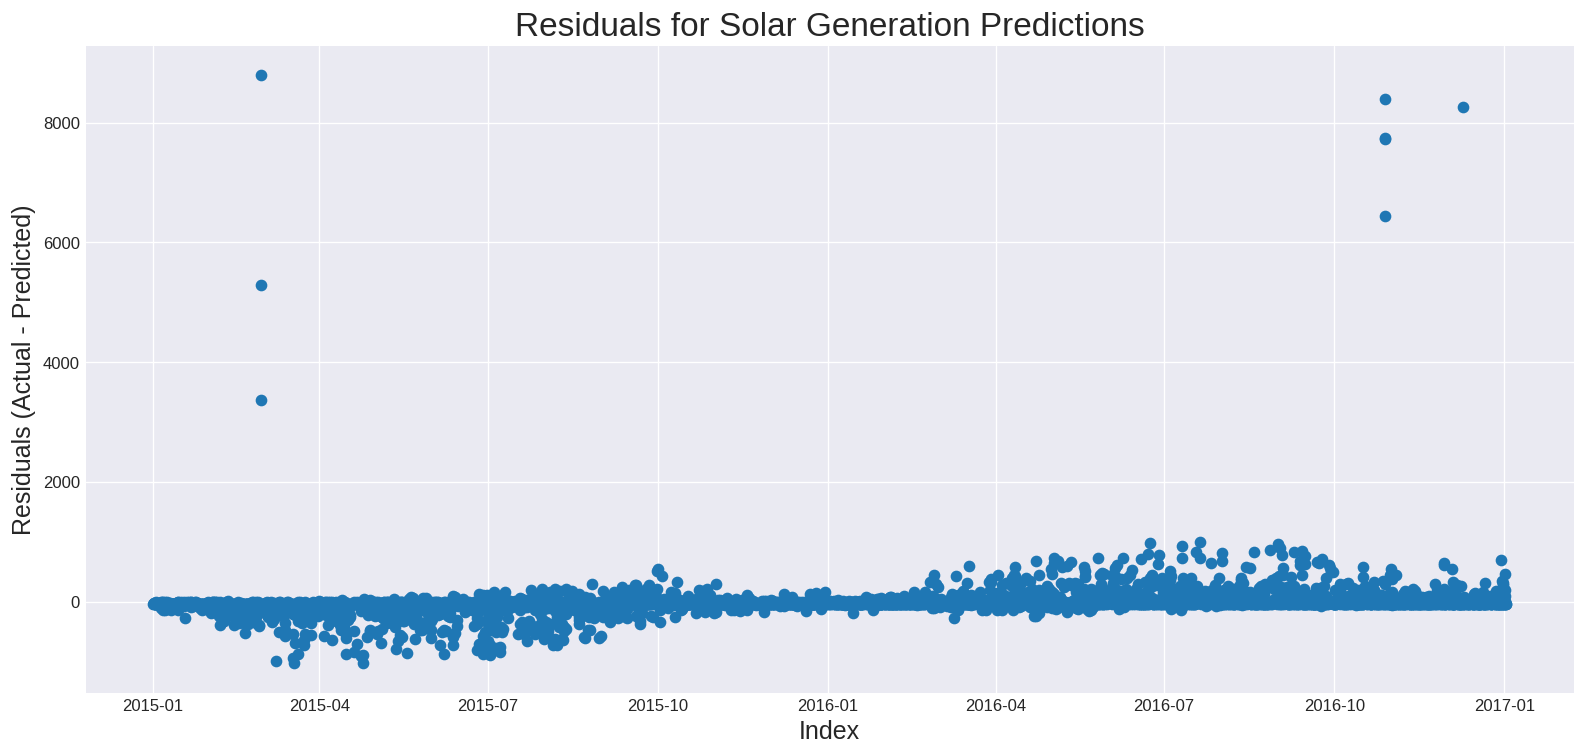

In [823]:
g = plt.plot(y1_test - y1_pred, marker='o', linestyle='')

# Label the axes for better understanding of the plot
plt.title('Residuals for Solar Generation Predictions', fontsize=20)  # Title for the plot
plt.xlabel('Index', fontsize=15)  # X-axis label
plt.ylabel('Residuals (Actual - Predicted)', fontsize=15)  # Y-axis label
plt.grid(True)  # Add grid for better readability
plt.show()

#SVM


### Hyperparameters in SVR: Decision Boundary, Kernel, and Hyperplane

The fundamental concept of Support Vector Regression (SVR) is to identify the best-fit line, which is essentially the hyperplane that encompasses the maximum number of data points.

Unlike traditional regression models that aim to minimize the error between actual and predicted values, SVR focuses on fitting the best line within a predefined threshold. This threshold represents the distance between the hyperplane and the boundary line.

However, the fitting time complexity of SVR is greater than quadratic, making it challenging to scale for datasets with more than a few thousand samples. For larger datasets, alternatives such as Linear SVR or Stochastic Gradient Descent (SGD) Regressor are often employed.

##solar energy

In [824]:
dataframe

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,0,0.0,0.0,37248,0.0,0.0,27913,10860.0,0.0000,667,0.0,0.0000,27246,0.0,0.0000
2015-01-01 00:00:00+00:00,0,41151.0,39723.0,37248,0.0,0.0,27913,10860.0,0.3171,667,517.0,0.7744,27246,8336.0,0.3059
2015-01-01 01:00:00+00:00,0,40135.0,38813.0,37248,0.0,0.0,27913,10860.0,0.3244,667,514.0,0.7710,27246,8540.0,0.3134
2015-01-01 02:00:00+00:00,0,39106.0,38490.0,37248,0.0,0.0,27913,10860.0,0.3249,667,518.0,0.7761,27246,8552.0,0.3139
2015-01-01 03:00:00+00:00,0,38765.0,38644.0,37248,0.0,0.0,27913,10860.0,0.3283,667,520.0,0.7793,27246,8643.0,0.3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-01 18:00:00+00:00,2017-01-01T19:00:00+0100,47589.0,50694.0,40089,0.0,0.0,37149,10227.0,0.2753,2591,930.0,0.3591,34558,9296.0,0.2690
2017-01-01 19:00:00+00:00,2017-01-01T20:00:00+0100,44974.0,48944.0,40089,0.0,0.0,37149,11094.0,0.2986,2591,1583.0,0.6109,34558,9512.0,0.2752
2017-01-01 20:00:00+00:00,2017-01-01T21:00:00+0100,42994.0,47692.0,40089,0.0,0.0,37149,11534.0,0.3105,2591,1981.0,0.7645,34558,9553.0,0.2764


In [825]:
# Drop rows with any missing values from the dataframe
dataframe = dataframe.dropna()

# Create feature variables for solar generation prediction
df_solar_x = dataframe[['DE_load_actual_entsoe_transparency', 'DE_load_forecast_entsoe_transparency', 'DE_solar_profile']]

# Create target variable for solar generation prediction
df_solar_y = dataframe['DE_solar_generation_actual']

# Reset the index of the dataframe after dropping missing values
dataframe = dataframe.reset_index()


In [826]:
dataframe = dataframe.dropna()
df_solar_x = dataframe[['utc_timestamp', 'DE_load_actual_entsoe_transparency', 'DE_load_forecast_entsoe_transparency', 'DE_solar_profile']]
df_solar_y = dataframe['DE_solar_generation_actual']
# dataframe['DE_solar_profile'].fillna(0, inplace=True)  # Uncomment if needed
dataframe = dataframe.reset_index()


In [827]:
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# sc_y = StandardScaler()
# x = sc_x.fit_transform(df_solar_x)
# # y=df_solar_y.reshape(2, 1)
# # y = sc_y.fit_transform(y)

In [828]:
# df_solar_x = df_solar_x.dropna()
df_solar_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype              
---  ------                                --------------  -----              
 0   utc_timestamp                         17568 non-null  datetime64[ns, UTC]
 1   DE_load_actual_entsoe_transparency    17568 non-null  float64            
 2   DE_load_forecast_entsoe_transparency  17568 non-null  float64            
 3   DE_solar_profile                      17568 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 549.1 KB


In [829]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with 20% of the data for testing
solar_x_train, solar_x_test, solar_y_train, solar_y_test = train_test_split(df_solar_x, df_solar_y, test_size=0.2, random_state=None)

# Display the training feature set
solar_x_train

# Uncomment the lines below if you need to reshape the target variable arrays
# solar_y_train = solar_y_train.reshape(-1, 1)  # Reshape solar_y_train if required for model compatibility
# solar_y_test = solar_y_test.reshape(-1, 1)    # Reshape solar_y_test if required for model compatibility


,utc_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_profile
12686,2016-06-12 13:00:00+00:00,46532.0,44574.0,0.2994
15752,2016-10-18 07:00:00+00:00,68678.0,65953.0,0.0490
882,2015-02-06 17:00:00+00:00,69539.0,67930.0,0.0000
1259,2015-02-22 10:00:00+00:00,53190.0,53938.0,0.2350
13951,2016-08-04 06:00:00+00:00,62216.0,60372.0,0.1691
...,...,...,...,...
159,2015-01-07 14:00:00+00:00,65496.0,61780.0,0.0310
12988,2016-06-25 03:00:00+00:00,40957.0,39922.0,0.0072
3994,2015-06-16 09:00:00+00:00,66913.0,65330.0,0.3902
1270,2015-02-22 21:00:00+00:00,52143.0,51328.0,0.0000


In [830]:
from sklearn.svm import SVR
import pandas as pd

# Assuming 'utc_timestamp' is a column in df_solar_x
# Convert 'utc_timestamp' to Unix timestamp (number of seconds since Jan 1, 1970)
solar_x_train['utc_timestamp'] = pd.to_datetime(solar_x_train['utc_timestamp']).astype(int) / 10**9
solar_x_test['utc_timestamp'] = pd.to_datetime(solar_x_test['utc_timestamp']).astype(int) / 10**9

# Initialize the Support Vector Regressor with the specified parameters
regressor = SVR(kernel='rbf', C=1e3, gamma=0.5, epsilon=0.01)

# Fit the SVR model using the training data
regressor.fit(solar_x_train, solar_y_train)

# Predict the solar generation for the test set
solar_y_pred = regressor.predict(solar_x_test)


In [831]:
solar_y_pred

array([788.01032492, 788.01032492, 788.01032492, ..., 788.01032492,
       788.01032492, 788.01032492])

In [832]:
solar_y_test

,DE_solar_generation_actual
9187,0.0
11780,0.0
11635,125.0
8106,0.0
13724,24.0
...,...
5805,0.0
8832,0.0
16744,102.0
11759,0.0


In [833]:
from sklearn import metrics
import numpy as np

# Calculate and print the Mean Absolute Error (MAE)
print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, solar_y_pred))

# Calculate and print the Mean Squared Error (MSE)
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, solar_y_pred))

# Calculate and print the Root Mean Squared Error (RMSE)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, solar_y_pred)))

# Calculate and print the R-squared score
print('R square score:', metrics.r2_score(solar_y_test, solar_y_pred))


Mean Absolute Error: 4096.708883004016
Mean Squared Error: 48091737.10266186
Root Mean Squared Error: 6934.8206251251995
R square score: -0.29008732732217246


### Hyperparameter Tuning

Literature suggests that the epsilon parameter should be set between \(10^{-3}\) and 1. For the C parameter, a suitable range would be between 1 and 100; setting C too high may lead to overfitting of the training data.

The gamma parameter is automatically determined by scikit-learn's SVR, so it's generally advisable to leave it unchanged.

Additionally, it's important to remember that tuning the kernel can significantly impact model performance and may be one of the most crucial hyperparameters to adjust.

In [834]:
from sklearn.svm import SVR

# Initialize the SVR regressor with the sigmoid kernel
regressor = SVR(kernel='sigmoid', C=1e3, gamma=0.5, epsilon=0.01)

# Fit the model using the training data
regressor.fit(solar_x_train, solar_y_train)


SVR(C=1000.0, epsilon=0.01, gamma=0.5, kernel='sigmoid')

In [835]:
# # Drop rows with NaN or infinite values
# solar_x_train = solar_x_train.replace([np.inf, -np.inf], np.nan).dropna()
# solar_y_train = solar_y_train[solar_x_train.index]  # Make sure to align y with the cleaned x

# # Alternatively, you could fill NaN values with the mean
# # solar_x_train.fillna(solar_x_train.mean(), inplace=True)
# # solar_y_train.fillna(solar_y_train.mean(), inplace=True)


In [836]:
# from sklearn.preprocessing import StandardScaler

# scaler_x = StandardScaler()
# solar_x_train = scaler_x.fit_transform(solar_x_train)
# solar_x_test = scaler_x.transform(solar_x_test)

# # If necessary, scale your target variable as well
# scaler_y = StandardScaler()
# solar_y_train = scaler_y.fit_transform(solar_y_train.values.reshape(-1, 1)).flatten()
# solar_y_test = scaler_y.transform(solar_y_test.values.reshape(-1, 1)).flatten()


In [837]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the input features using StandardScaler
scaler_x = StandardScaler()
solar_x_train = scaler_x.fit_transform(solar_x_train)
# Assuming solar_x_test exists for future predictions, scale it as well
# solar_x_test = scaler_x.transform(solar_x_test)

# If the target variable (solar_y_train) has a wide range, consider scaling it too:
scaler_y = StandardScaler()
solar_y_train = scaler_y.fit_transform(solar_y_train.values.reshape(-1, 1)).flatten()
# Assuming solar_y_test exists for future predictions, scale it as well
# solar_y_test = scaler_y.transform(solar_y_test.values.reshape(-1, 1)).flatten()

# Initialize the SVR regressor with the polynomial kernel
# You might need to adjust C, gamma, and epsilon
regressor = SVR(kernel='poly', C=1.0, gamma='scale', epsilon=0.1)  # Adjusted hyperparameters

# Fit the model using the scaled training data
regressor.fit(solar_x_train, solar_y_train)

from sklearn.metrics import r2_score

# Calculate R-squared score for the predictions
r2 = r2_score(solar_y_test, solar_y_pred)
print("R-squared:", r2)

R-squared: -0.29008732732217246


In [838]:
solar_y_pred = regressor.predict(solar_x_test)
solar_y_pred

#y_pred = y.inverse_transform(y_pred)

array([-2.17840302e+25, -2.22075727e+25, -2.21834253e+25, ...,
       -2.30306991e+25, -2.22042946e+25, -2.23838497e+25])

In [839]:
#only run when hyperparamter tuning is required
# param = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1,0.5, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf', 'poly', 'sigmoid'],
#                'epsilon':[0.1,0.01,0.001]}

# from sklearn.model_selection import GridSearchCV

# #param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

# modelsvr = SVR()

# grids = GridSearchCV(modelsvr,param)

# grids.fit(solar_x_train,solar_y_train)

In [840]:

# # print best parameter after tuning
# print(grids.best_params_)

# # print how our model looks after hyper-parameter tuning
# print(grids.best_estimator_)

In [841]:
from sklearn.metrics import r2_score
r2_score(solar_y_pred,solar_y_test)

-695.9103345976297

In [842]:
# plt.figure(1)
# plt.plot(solar_y_test, solar_y_pred, c = 'navy', label = 'Predicted')
# plt.legend()
# plt.show()

In [843]:
from sklearn.metrics import r2_score
r2_score(solar_y_pred,solar_y_test)

-695.9103345976297

using linear SVR (ideal for large datasets)

In [844]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(verbose=0, dual=True)

# LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
#           intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
#           random_state=None, tol=0.0001, verbose=0)

#Then, we'll fit the model on train data and check the model accuracy score.

lsvr.fit(solar_x_train, solar_y_train)
y_pred = lsvr.predict(solar_x_test)
y_pred


array([389785.51160007, 392290.05120037, 392147.43594049, ...,
       397082.34151742, 392271.4937088 , 393324.04513988])

In [845]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

Mean Absolute Error: 385241.25216499134
Mean Squared Error: 148473945942.81085
Root Mean Squared Error: 385323.17078370834
R square score: -3981.895350389322


In [846]:
# from sklearn.model_selection import GridSearchCV
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# svr_gs = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K, scoring=scorer)

##wind energy

In [847]:
dataframe.dropna()
df_wind_x=dataframe[['DE_wind_capacity','DE_wind_profile','DE_wind_offshore_generation_actual','DE_wind_offshore_profile','DE_wind_onshore_generation_actual','DE_wind_onshore_profile']]
df_wind_y=dataframe['DE_wind_generation_actual']

In [848]:
from sklearn.model_selection import train_test_split
wind_x_train, wind_x_test,wind_y_train,wind_y_test = train_test_split(df_wind_x,df_wind_y,test_size = 0.2, random_state = None)

In [849]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(verbose=0, dual=True)
# LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
#           intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
#           random_state=None, tol=0.0001, verbose=0)

#Then, we'll fit the model on train data and check the model accuracy score.

lsvr.fit(wind_x_train,wind_y_train)
y_pred = lsvr.predict(wind_x_test)

In [850]:
from sklearn.metrics import r2_score
r2_score(y_pred,wind_y_test)

0.980811223925834

In [851]:
from sklearn.metrics import mean_squared_error
ypred = lsvr.predict(wind_x_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(wind_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(wind_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(wind_y_test, y_pred)))
print('R square score:', metrics.r2_score(wind_y_test, y_pred))

Mean Absolute Error: 190.9771113205276
Mean Squared Error: 888055.2024277778
Root Mean Squared Error: 942.3668088529953
R square score: 0.9815865650612182


In [852]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(wind_x_train,wind_y_train)

SVR()

#RANDOM FOREST

parameters in Random forest- n_estimators and random state

##solar energy

In [853]:
dataframe.dropna()
df_solar_x=dataframe[['DE_load_actual_entsoe_transparency','DE_load_forecast_entsoe_transparency','DE_solar_profile']]
df_solar_y=dataframe['DE_solar_generation_actual']
# df_solar_x['DE_solar_profile'].fillna(0,inplace=True)
# df_solar_y.fillna(0,inplace=True)
df_solar_x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DE_load_actual_entsoe_transparency    17568 non-null  float64
 1   DE_load_forecast_entsoe_transparency  17568 non-null  float64
 2   DE_solar_profile                      17568 non-null  float64
dtypes: float64(3)
memory usage: 411.9 KB


In [854]:
df_solar_x.isna().sum()

,0
DE_load_actual_entsoe_transparency,0
DE_load_forecast_entsoe_transparency,0
DE_solar_profile,0


In [855]:
from sklearn.model_selection import train_test_split
solar_x_train, solar_x_test,solar_y_train,solar_y_test = train_test_split(df_solar_x,df_solar_y,test_size = 0.2, random_state = None)



In [856]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = solar_x_train

target = solar_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(solar_x_train,solar_y_train)

RandomForestRegressor()

feature importance

Feature: 0, Score: 0.00191
Feature: 1, Score: 0.00254
Feature: 2, Score: 0.99554


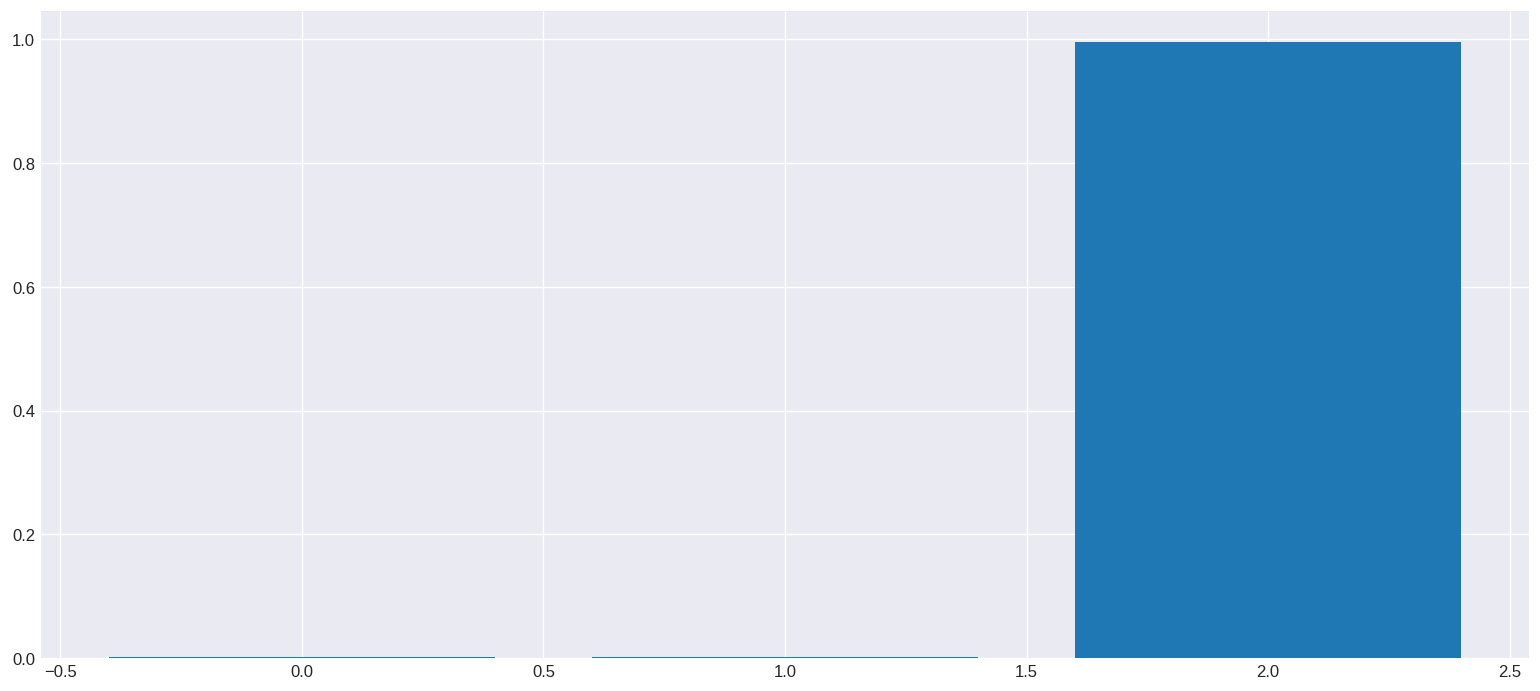

In [857]:
# get importance
importance = rfr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

most important feature for random forest is solar_profile

In [858]:
y_pred = rfr.predict(solar_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

Mean Absolute Error: 97.54396129766647
Mean Squared Error: 221263.05230540692
Root Mean Squared Error: 470.38606729516016
R square score: 0.9939945715425855


##wind energy

In [859]:

df_wind_x=dataframe[['DE_wind_capacity','DE_wind_profile','DE_wind_offshore_generation_actual','DE_wind_offshore_profile','DE_wind_onshore_generation_actual','DE_wind_onshore_profile']]
df_wind_y=dataframe['DE_wind_generation_actual']

In [860]:
#df_wind_x.info()   #no null values
#df_wind_y.isna()

In [861]:
from sklearn.model_selection import train_test_split
wind_x_train, wind_x_test,wind_y_train,wind_y_test = train_test_split(df_wind_x,df_wind_y,test_size = 0.2, random_state = None)

In [862]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = wind_x_train

target = wind_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(wind_x_train,wind_y_train)

RandomForestRegressor()

feature importance

Feature: 0, Score: 0.00691
Feature: 1, Score: 0.17315
Feature: 2, Score: 0.00485
Feature: 3, Score: 0.00367
Feature: 4, Score: 0.81068
Feature: 5, Score: 0.00074


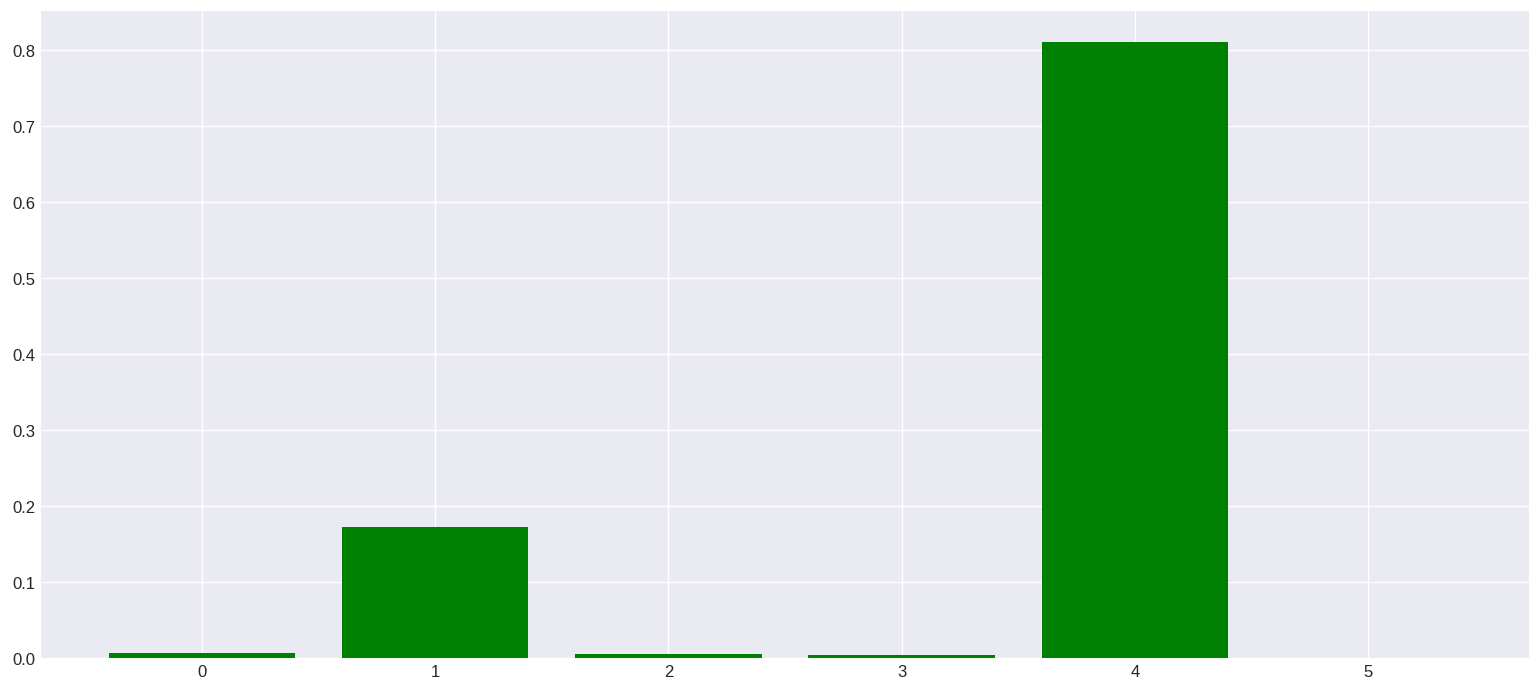

In [863]:
# get importance
importance = rfr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance,color='green')
pyplot.show()

wind onshore generation actual and wind_profile are the most important features

In [864]:
y_pred = rfr.predict(wind_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

Mean Absolute Error: 8147.120049300543
Mean Squared Error: 108918790.9519538
Root Mean Squared Error: 10436.416576198642
R square score: -1.956227892161528


poor r sqaure score--> making use of feature importance to remove unimportant features

In [865]:
df_wind_x2=dataframe[['DE_wind_profile']]
from sklearn.model_selection import train_test_split
wind_x_train, wind_x_test,wind_y_train,wind_y_test = train_test_split(df_wind_x2,df_wind_y,test_size = 0.2, random_state = None)

In [866]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = wind_x_train

target = wind_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(wind_x_train,wind_y_train)

RandomForestRegressor()

In [867]:
y_pred = rfr.predict(wind_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

Mean Absolute Error: 8146.862908527376
Mean Squared Error: 109252463.16433655
Root Mean Squared Error: 10452.390308648857
R square score: -1.9652842826379908


to improve score--> Hyper parameter tuning

In [868]:
#wind energy
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)
regressor.fit(X2_train, y2_train)
y2_pred = regressor.predict(X2_test)

r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)


print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))

Wind R2 =  0.9706850296665197
Mean Absolute Error: 8146.862908527376
Mean Squared Error: 109252463.16433655
Root Mean Squared Error: 10452.390308648857


#ARIMA MODEL

##For solar energy

In [869]:
# Create a series for the solar generation
solar_power = modified['DE_solar_generation_actual']

In [870]:
solar_power

,DE_solar_generation_actual
utc_timestamp,
2014-12-31 00:00:00+00:00,0.000000
2015-01-01 00:00:00+00:00,712.416667
2015-01-02 00:00:00+00:00,323.208333
2015-01-03 00:00:00+00:00,301.541667
2015-01-04 00:00:00+00:00,832.583333
...,...
2016-12-28 00:00:00+00:00,810.333333
2016-12-29 00:00:00+00:00,1787.916667
2016-12-30 00:00:00+00:00,2022.750000


In [871]:
solar_power.describe()

,DE_solar_generation_actual
count,733.000000
mean,3950.678115
std,2523.331864
min,0.000000
25%,1555.250000
50%,3952.500000
75%,6042.375000
max,9571.250000


In [872]:
# Check the decomposition of the solar power data
from statsmodels.api import tsa
decomposition = tsa.seasonal_decompose(solar_power, period=365, model='additive')

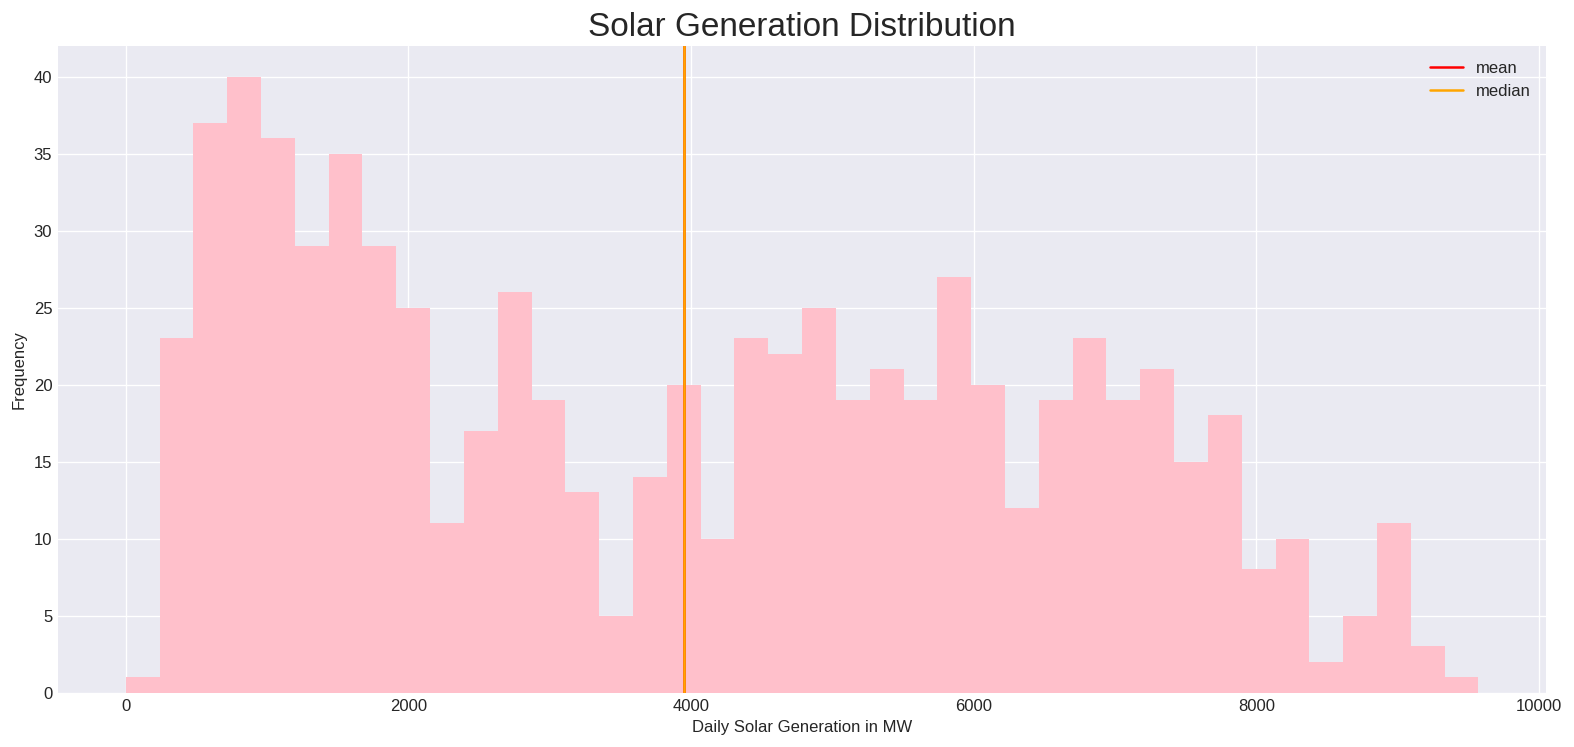

In [873]:
# Create a new figure for the plot
plt.figure()

# Plot a histogram of the solar generation data with 40 bins
plt.hist(solar_power, bins=40,color='pink')

# Add a title to the plot
plt.title('Solar Generation Distribution', fontsize=20)

# Label the y-axis as 'Frequency'
plt.ylabel('Frequency')

# Label the x-axis as 'Daily Solar Generation in MW'
plt.xlabel('Daily Solar Generation in MW')

# Add a vertical line representing the mean value in red
plt.axvline(solar_power.mean(), c='red', label ='mean')

# Add a vertical line representing the median value in orange
plt.axvline(solar_power.median(), c='orange', label ='median')

# Add a legend to differentiate between the mean and median lines
plt.legend()

# Display the plot
plt.show()


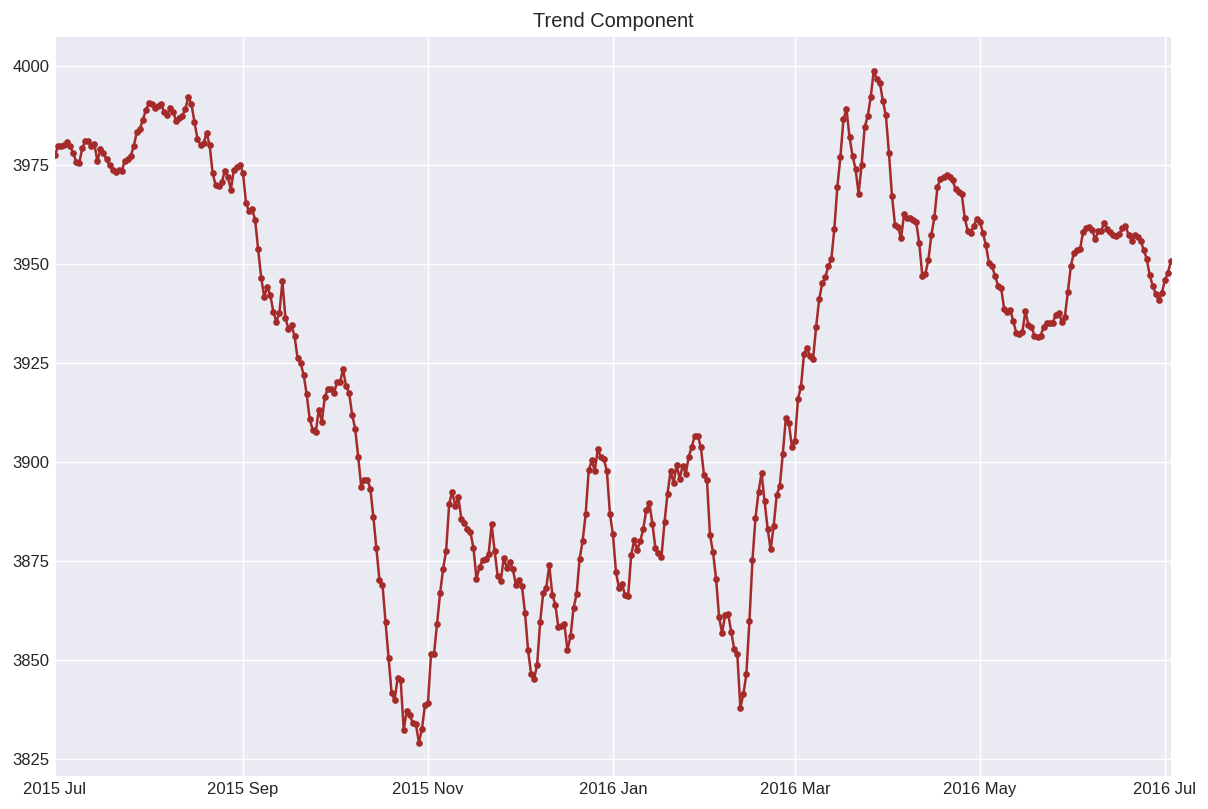

In [874]:
import matplotlib.dates as mdates
# Trend
plt.figure(figsize=(12,8))
plt.plot(decomposition.trend, marker='.',color='brown')
plt.title('Trend Component')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show();


#stationery check

In [875]:
s = adfuller(solar_power, regression='ct')
print('p-value:{}'.format(s[1]))

p-value:0.7915810735282001


In [876]:
# Lets check the differencce
s = adfuller(solar_power.diff().dropna(), regression='c')
print('p-value:{}'.format(s[1]))

p-value:1.775922422517609e-16


Series with difference is stationary because fo the p-value less than 0.05

#Finding the order of differencing for the ARIMA model

In [877]:
# check the time series
solar_power

,DE_solar_generation_actual
utc_timestamp,
2014-12-31 00:00:00+00:00,0.000000
2015-01-01 00:00:00+00:00,712.416667
2015-01-02 00:00:00+00:00,323.208333
2015-01-03 00:00:00+00:00,301.541667
2015-01-04 00:00:00+00:00,832.583333
...,...
2016-12-28 00:00:00+00:00,810.333333
2016-12-29 00:00:00+00:00,1787.916667
2016-12-30 00:00:00+00:00,2022.750000


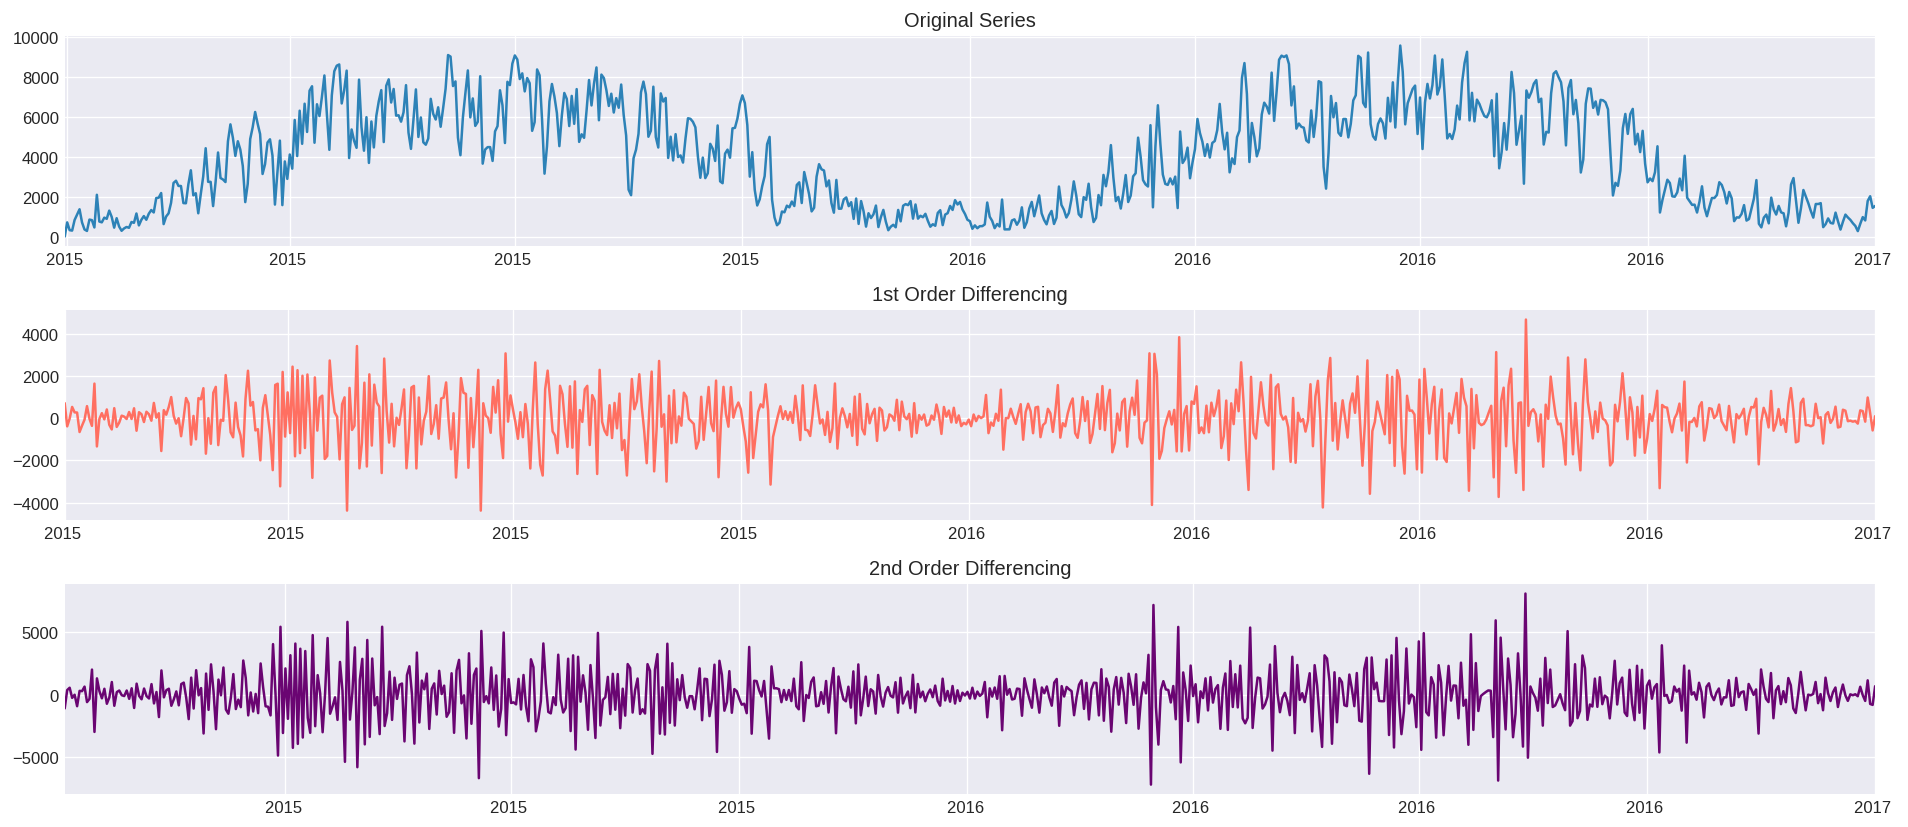

In [878]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Create 3 subplots vertically
plt.subplots(3, 1)

# Plot the original series in the first subplot
plt.subplot(3,1,1)
plt.plot(solar_power, c='#2D82B7')  # Vibrant blue for original series
plt.title('Original Series')

# Customize the x-axis for better date formatting
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

# Plot the 1st order differencing in the second subplot
plt.subplot(3,1,2)
plt.plot(solar_power.diff().dropna(), c='#FF6F61')  # Vibrant coral for 1st difference
plt.title('1st Order Differencing')

# Customize the x-axis for better date formatting
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

# Plot the 2nd order differencing in the third subplot
plt.subplot(3,1,3)
plt.plot(solar_power.diff().diff().dropna(), c='#6A0572')  # Vibrant purple for 2nd difference
plt.title('2nd Order Differencing')

# Customize the x-axis for better date formatting
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

# Adjust layout for better spacing between plots
plt.tight_layout()

# Display the plot
plt.show()


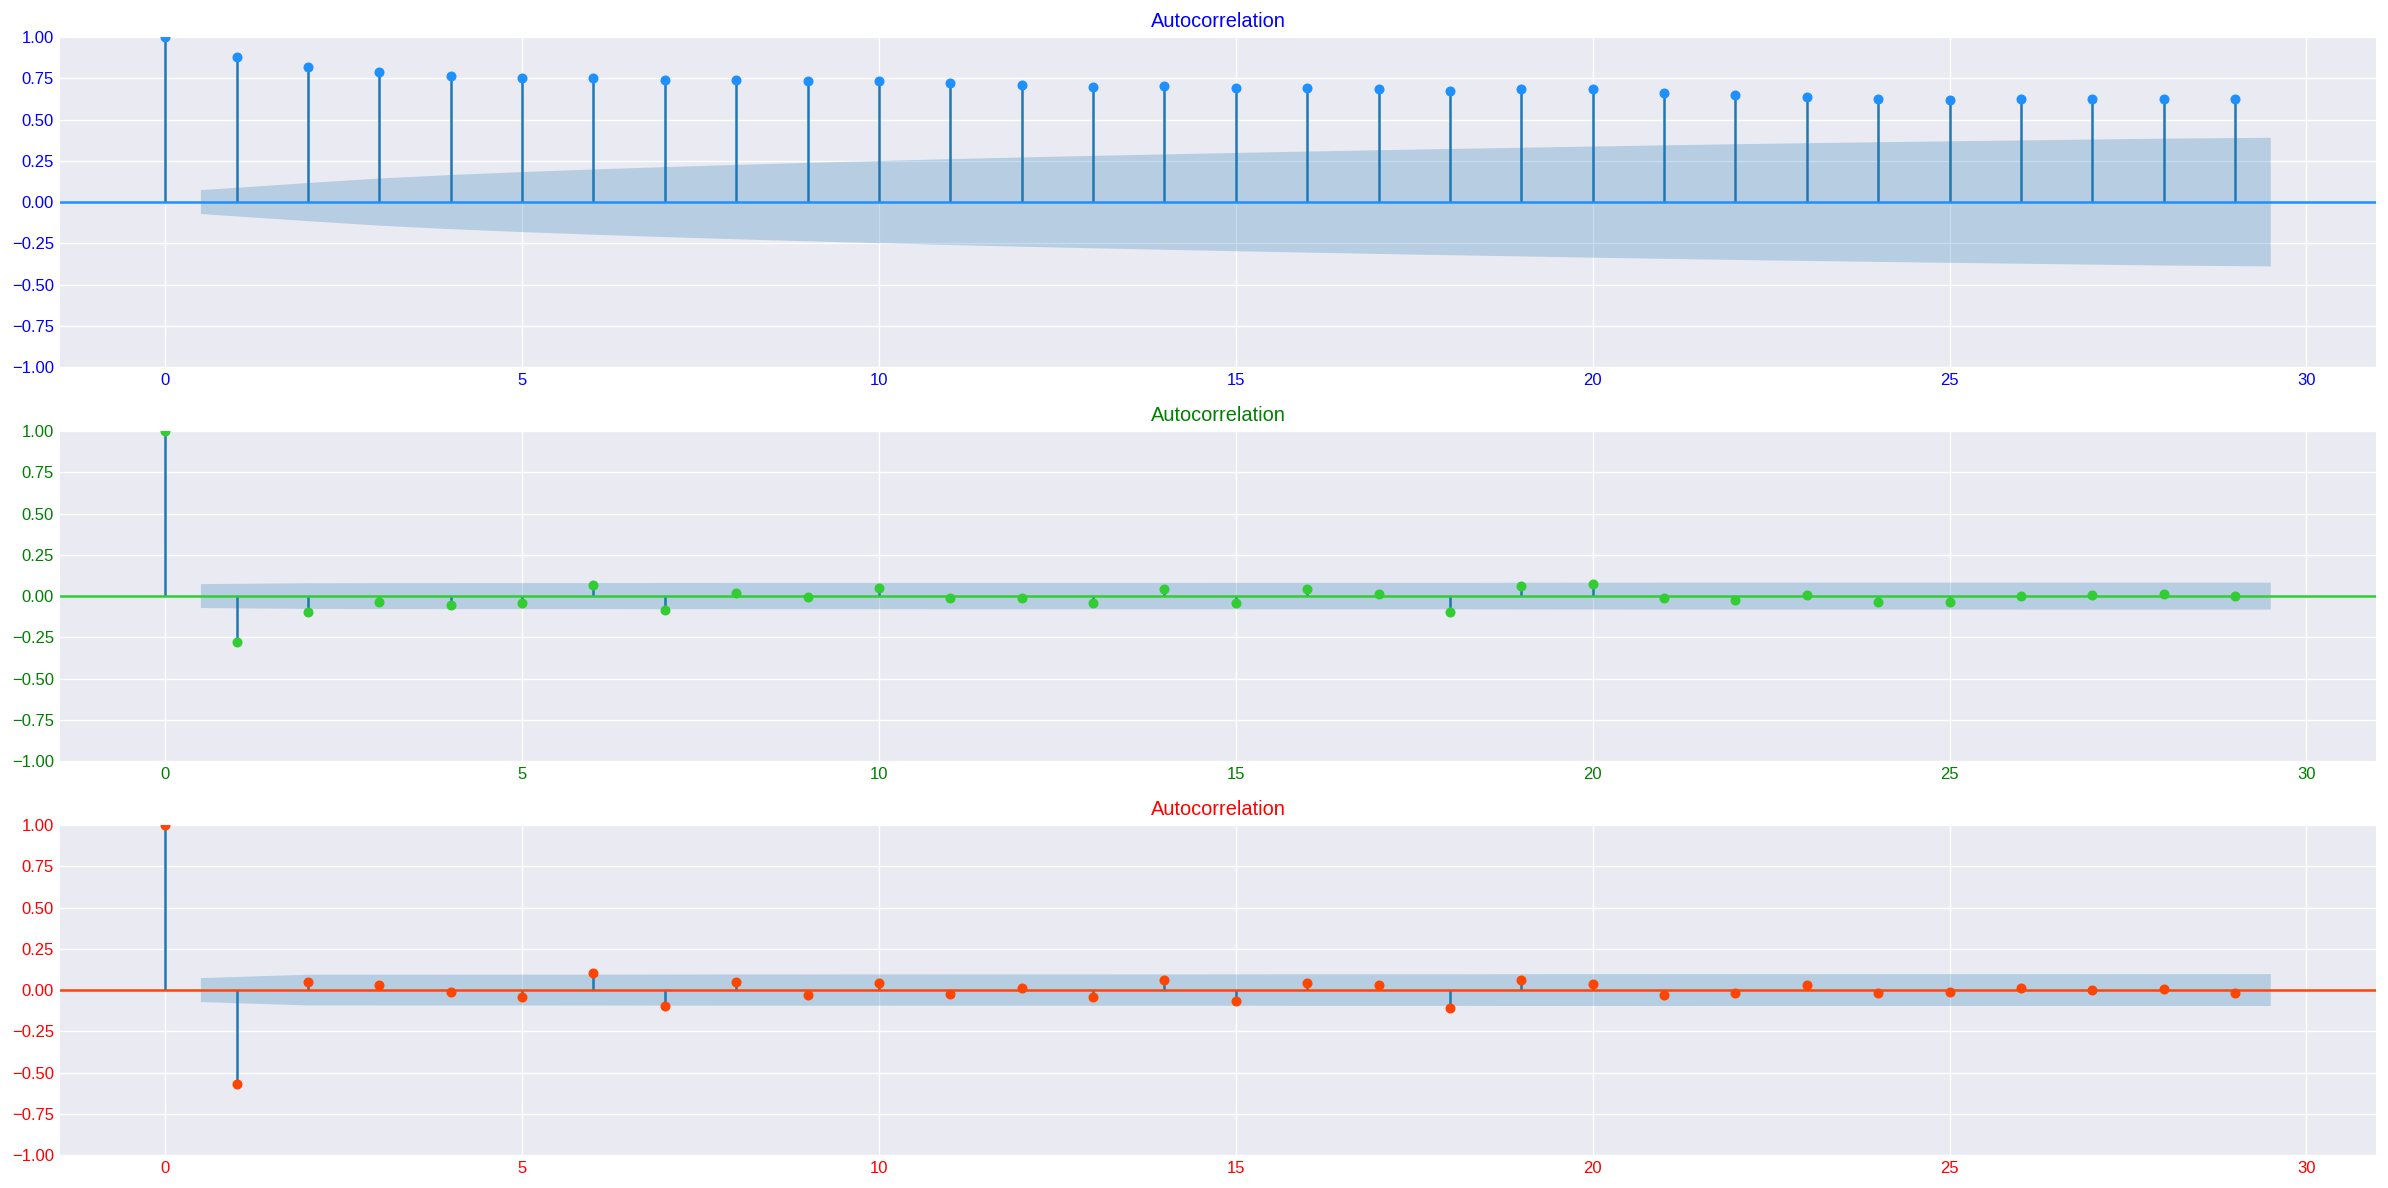

In [879]:
from statsmodels.graphics.tsaplots import plot_acf

# Create subplots to visualize autocorrelation
fig, ax = plt.subplots(3, 1, figsize=(20, 10))

# Original time series autocorrelation - using vibrant blue
ax[0].set_title('ACF of Original Series', fontsize=15, color='blue')
ax[0].tick_params(axis='x', colors='blue')
ax[0].tick_params(axis='y', colors='blue')
ax[0].spines['bottom'].set_color('blue')
ax[0].spines['left'].set_color('blue')
fig = plot_acf(solar_power, ax=ax[0], color='dodgerblue')

# 1st difference autocorrelation - using vibrant green
ax[1].set_title('ACF of 1st Order Differencing', fontsize=15, color='green')
ax[1].tick_params(axis='x', colors='green')
ax[1].tick_params(axis='y', colors='green')
ax[1].spines['bottom'].set_color('green')
ax[1].spines['left'].set_color('green')
fig = plot_acf(solar_power.diff().dropna(), ax=ax[1], color='limegreen')

# 2nd difference autocorrelation - using vibrant red
ax[2].set_title('ACF of 2nd Order Differencing', fontsize=15, color='red')
ax[2].tick_params(axis='x', colors='red')
ax[2].tick_params(axis='y', colors='red')
ax[2].spines['bottom'].set_color('red')
ax[2].spines['left'].set_color('red')
fig = plot_acf(solar_power.diff().diff().dropna(), ax=ax[2], color='orangered')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


From the above plots, it’s evident that the time series becomes stationary after applying first-order differencing. The second-order differencing declines too rapidly, indicating possible over-differencing. Therefore, I’ll use \( d = 1 \) in the ARIMA model. The first-differenced graph clearly shows that the series becomes much more stationary at this level.

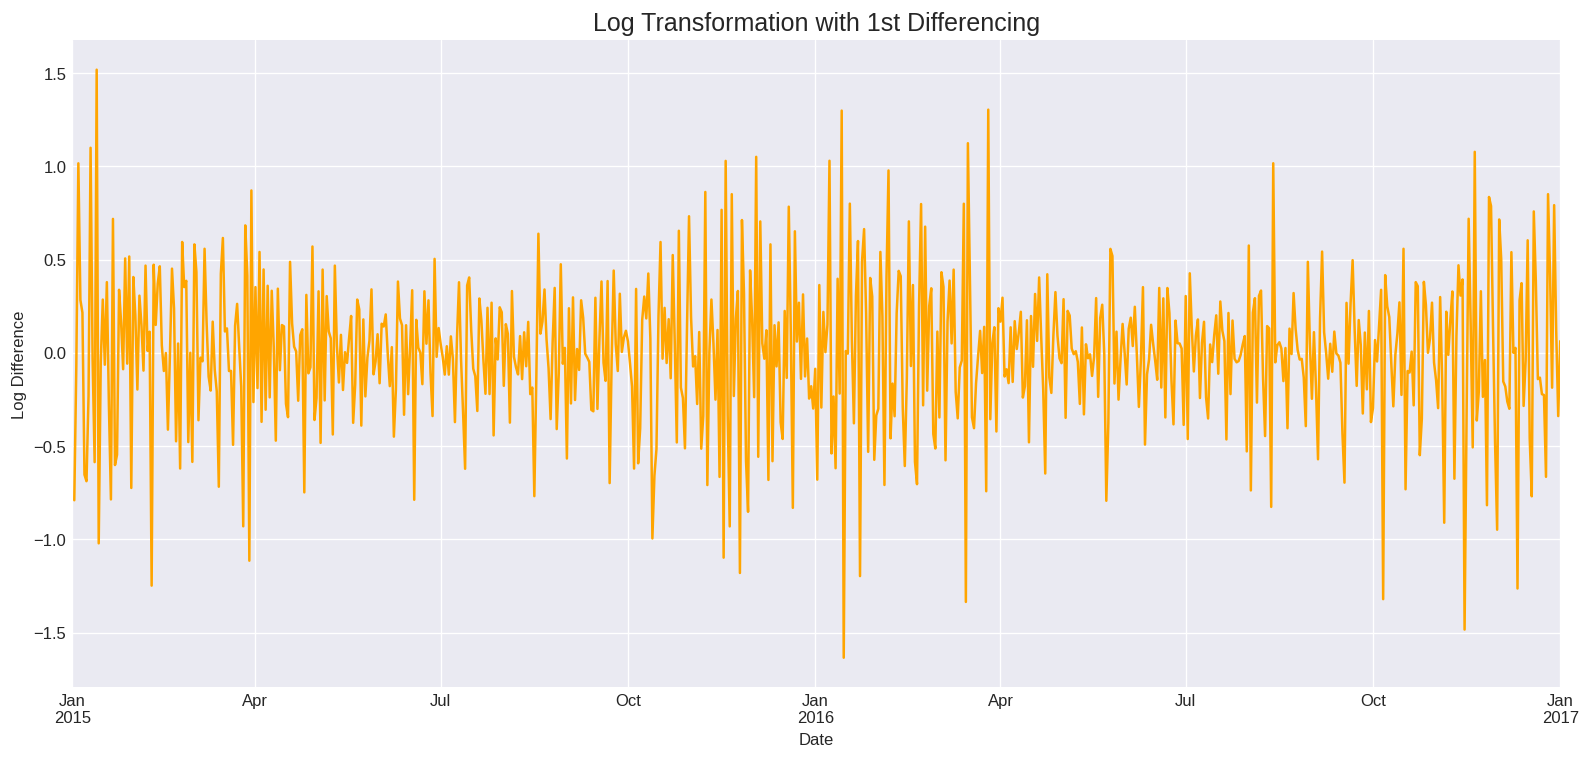

In [880]:
# Applying log transformation with differencing and plotting in orange
np.log(solar_power).diff().dropna().plot(c='orange')
plt.title('Log Transformation with 1st Differencing', fontsize=15)
plt.ylabel('Log Difference')
plt.xlabel('Date')
plt.show()


In [881]:
solar_log= np.log(solar_power).diff().dropna()

#Finding order of the ar term

For the ARIMA model we need to first find the the order (p,d,q). To find the first p order, it is good to look at the Partial auto correlation plot

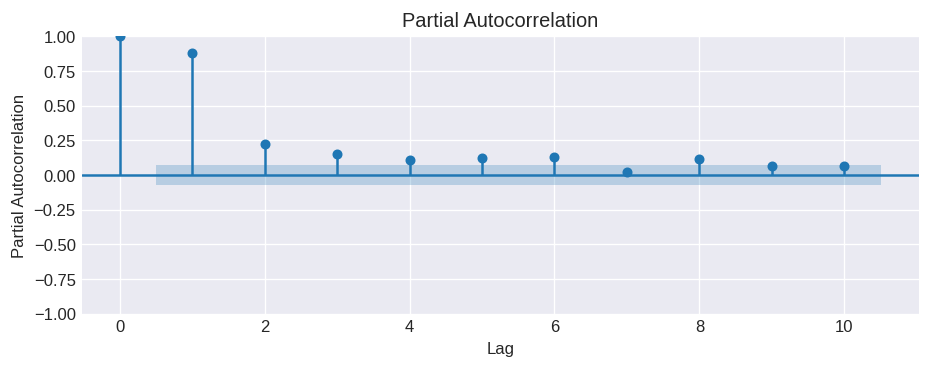

In [882]:
# Plot the PACF with custom x-axis scale
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize': (9, 3), 'figure.dpi': 120})

# Create the PACF plot
plot_pacf(solar_power, lags=10)

# Set the x-axis and y-axis labels
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

# Adjusting the x-axis scale to increment by 10 units (example)
plt.xticks(ticks=np.arange(0, 11, 2))  # Modify this based on your data

# Show the plot
plt.show()


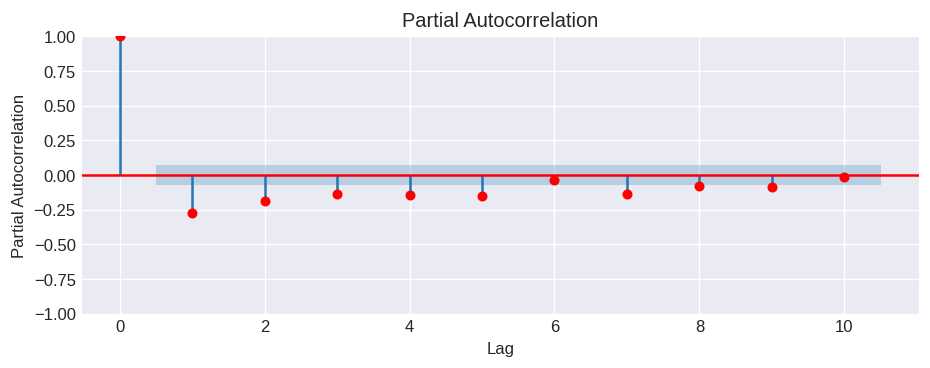

In [883]:
# lets check the differened one as well
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})


plot_pacf(solar_power.diff().dropna(), lags=10,color='red')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

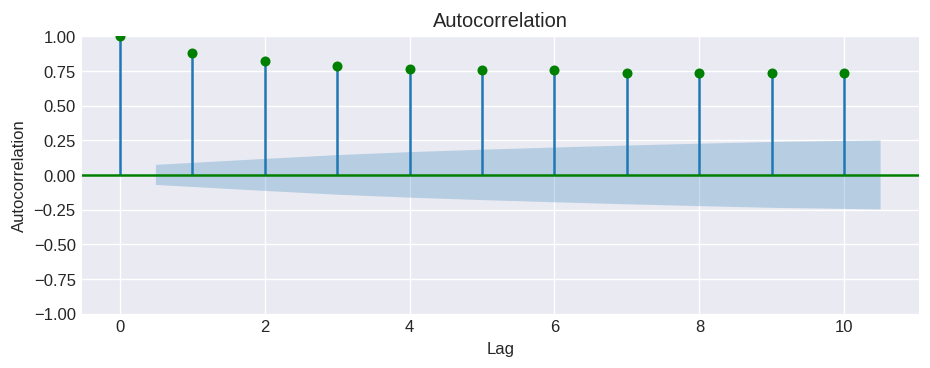

In [884]:
# to find the q value, it is helpful to look at the autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(solar_power, lags=10,color='green')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

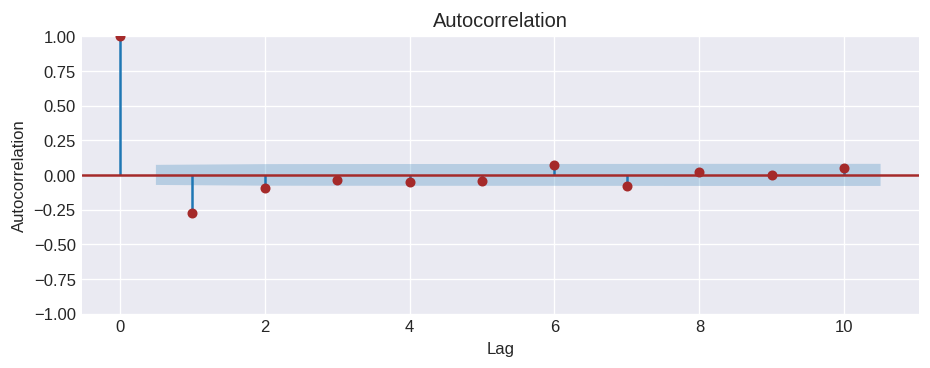

In [885]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(solar_power.diff().dropna(), lags=10,color='brown')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

It looks likes 3 is the best answer for q=3.

#Train and test split

In [886]:
test_percent = .15
test_number = int(solar_power.shape[0]*test_percent)
train_s = solar_power[:-test_number]
test_s = solar_power[-test_number:]

In [887]:
train_s.shape

(624,)

In [888]:
test_s.shape

(109,)

In [889]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_s = SARIMAX(train_s, order=(6,1,6),
                enforce_stationarity=False,
                enforce_invertibility=False,
                trend="t") # order of _ for AR, 1 differentiation, and _ for MA
model_fit_s = model_s.fit(maxiter=2000)

print('Coefficients: %s' % model_fit_s.params)

Coefficients: drift     6.167821e-02
ar.L1    -8.375715e-01
ar.L2    -3.934482e-01
ar.L3    -4.590390e-01
ar.L4    -8.172467e-01
ar.L5    -2.930526e-01
ar.L6     4.038062e-01
ma.L1     3.896451e-01
ma.L2    -1.576408e-01
ma.L3     4.444595e-02
ma.L4     4.583701e-01
ma.L5    -2.889891e-01
ma.L6    -7.804001e-01
sigma2    1.376676e+06
dtype: float64


RMSE:  2552.7309853682978


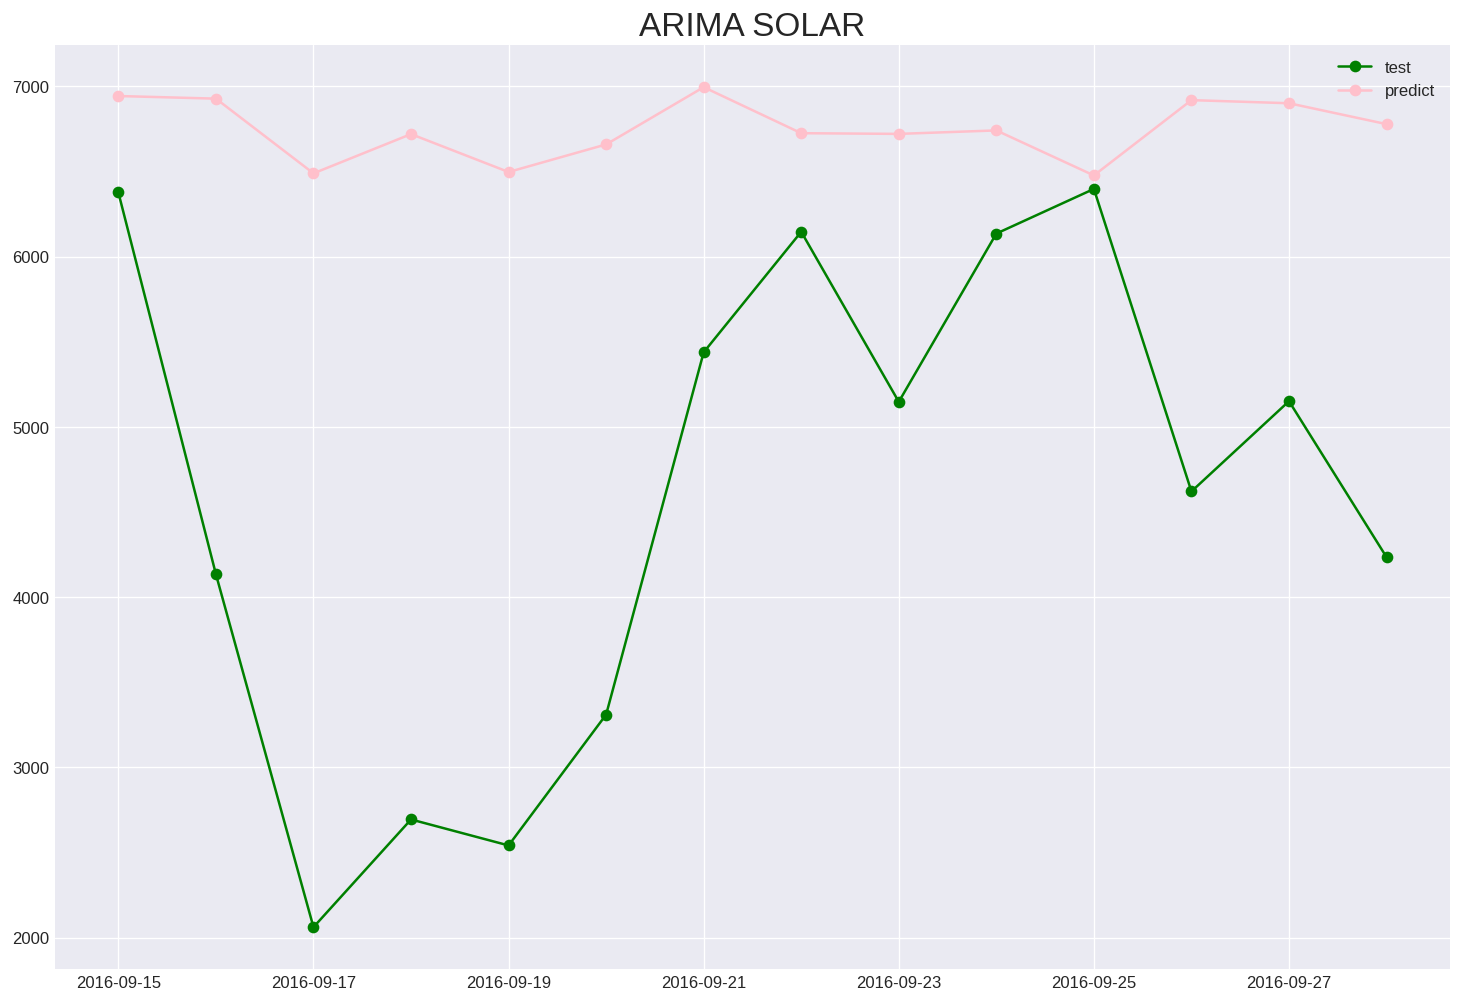

In [890]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions = model_fit_s.predict(start=len(train_s), end=len(train_s)+len(test_s)-1, typ="levels", index= test_s.index)

print("RMSE: ", sqrt(mean_squared_error(test_s[:14], predictions[:14])))
plt.figure(figsize=(15,10))
plt.plot(test_s[:14], c="green", label="test", marker='o')
plt.plot(predictions[:14], c="pink", label="predict", marker='o')
plt.legend()
plt.title('ARIMA SOLAR', fontsize=(20))
plt.show();

In [891]:
from sklearn.metrics import mean_absolute_error
print("MAE: ", mean_absolute_error(test_s[:14], predictions[:14]))

MAE:  2150.4511758887897


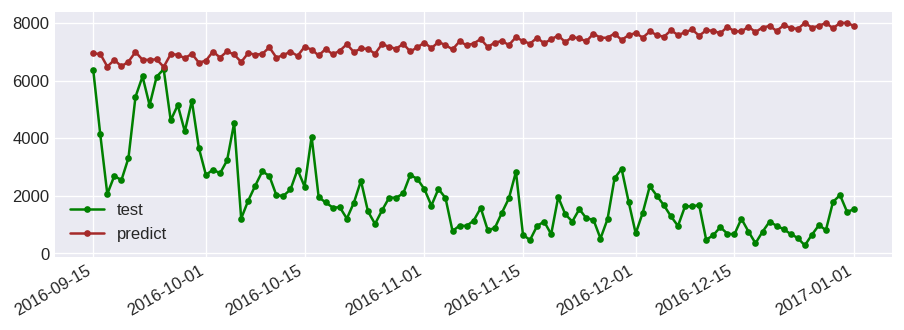

In [892]:
# make prediction
predictions = model_fit_s.predict(start=len(train_s), end=len(train_s)+len(test_s)-1, typ="levels", index=test_s.index)

fig = plt.figure()
plt.plot(test_s, c="green", label="test", marker='.')
plt.plot(predictions, c="brown", label="predict", marker='.')
plt.legend()
fig.autofmt_xdate()
plt.show();

In [893]:
# Run a loop throgh the model to find the best parameters
# best_MAE = float('inf')

# for p in range(1,7):
#     for d in range(0,2):
#         for q in range(1,7):

#             print(f"Trying values of {(p,d,q)}",end = "\r")

#             model = SARIMAX(train_s,order = (p,d,q),
#                            enforce_stationary = False,
#                            enforce_invertibility = False,
#                            trend = "t")

#             model_fit = model.fit(maxiter = 2000)

#             predictions = model_fit.predict(start=len(train_s),end = len(train_s) + len(test_s) - 1,typ="levels", index=test_s.index)

#             current_MAE = mean_absolute_error(test_s[:10],predictions[:10])

#             if (best_MAE > current_MAE):
#                 best_MAE = current_MAE
#                 print(f"Found new best MAE of {best_MAE} with values {(p,d,q)}")

#For wind energy

In [894]:
# create a wind_power series
wind_power = modified['DE_wind_generation_actual']

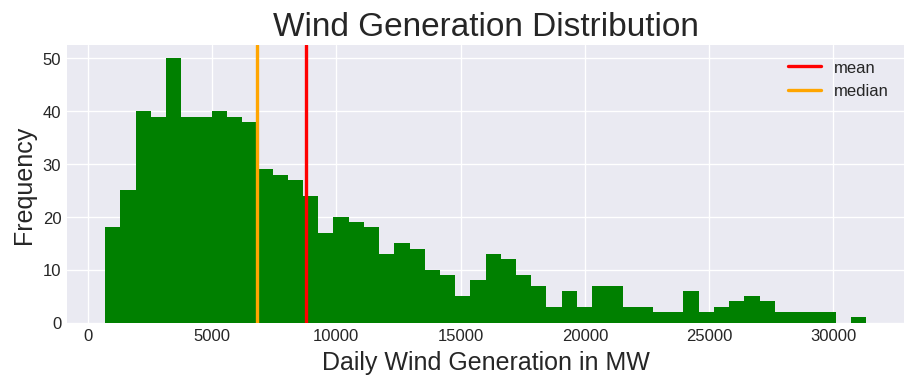

In [895]:
plt.figure()
plt.hist(wind_power, bins=50, color='green')  # Use vibrant color for bars
plt.title('Wind Generation Distribution', fontsize=20)  # fontsize only
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Daily Wind Generation in MW', fontsize=15)  # Adjusted label to 'Wind'

# Adding vertical lines for mean and median
plt.axvline(wind_power.mean(), c='red', label='mean', linewidth=2)  # Mean in red
plt.axvline(wind_power.median(), c='orange', label='median', linewidth=2)  # Median in orange

plt.legend()
plt.show()


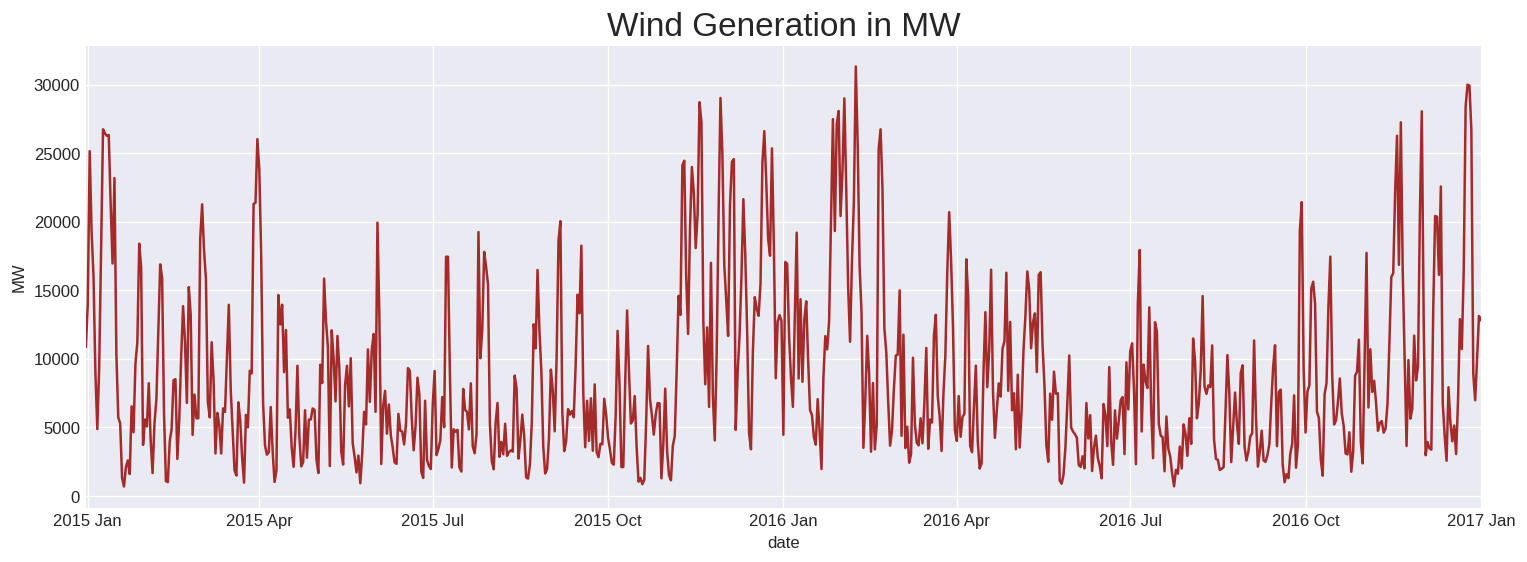

In [896]:
plt.figure(figsize=(15,5))
plt.plot(wind_power, c='brown')
plt.title('Wind Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

In [897]:
# Check the decomposition of the wind power data
from statsmodels.api import tsa
decomposition = tsa.seasonal_decompose(wind_power, period=365, model='additive')

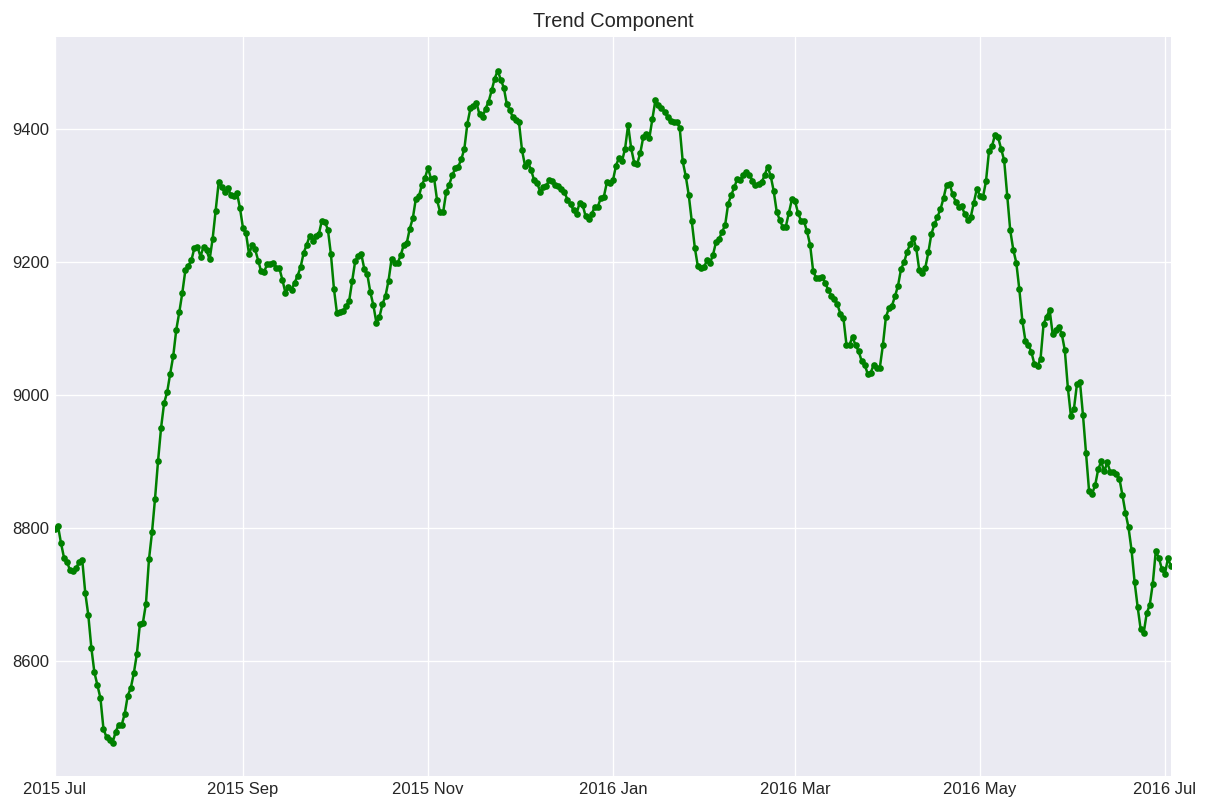

In [898]:
import matplotlib.dates as mdates
# Trend
plt.figure(figsize=(12,8))
plt.plot(decomposition.trend, marker='.',color='green')
plt.title('Trend Component')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show();


#Stationery Check

In [899]:
s = adfuller(wind_power, regression='ct')
print('p-value:{}'.format(s[1]))

p-value:4.725836740256935e-15


In [900]:
# Lets check the differencce
s = adfuller(wind_power.diff().dropna(), regression='c')
print('p-value:{}'.format(s[1]))

p-value:4.383851025931104e-22


The series is stationery

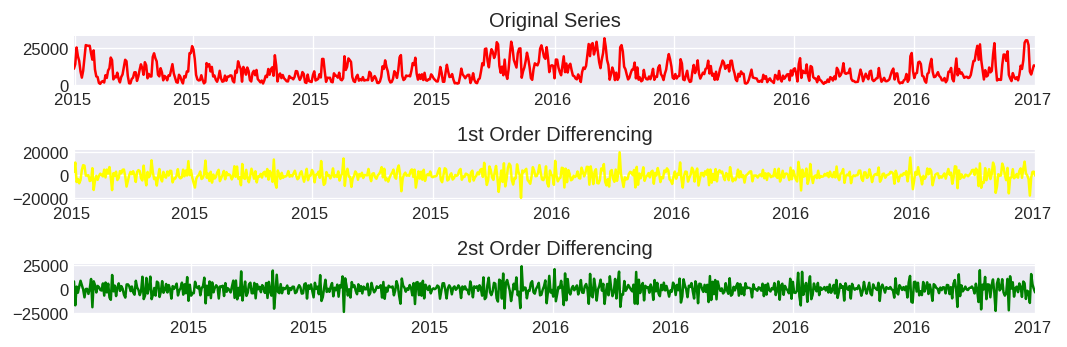

In [901]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.subplots(3, 1)

# orginal series
plt.subplot(3,1,1)
plt.plot(wind_power,c='red')
plt.title('Original Series')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.subplot(3,1,2)
plt.plot(wind_power.diff().dropna(), c='yellow')
plt.title('1st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))


plt.subplot(3,1,3)
plt.plot(wind_power.diff().diff().dropna(), c='green')
plt.title('2st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.tight_layout()
plt.show()


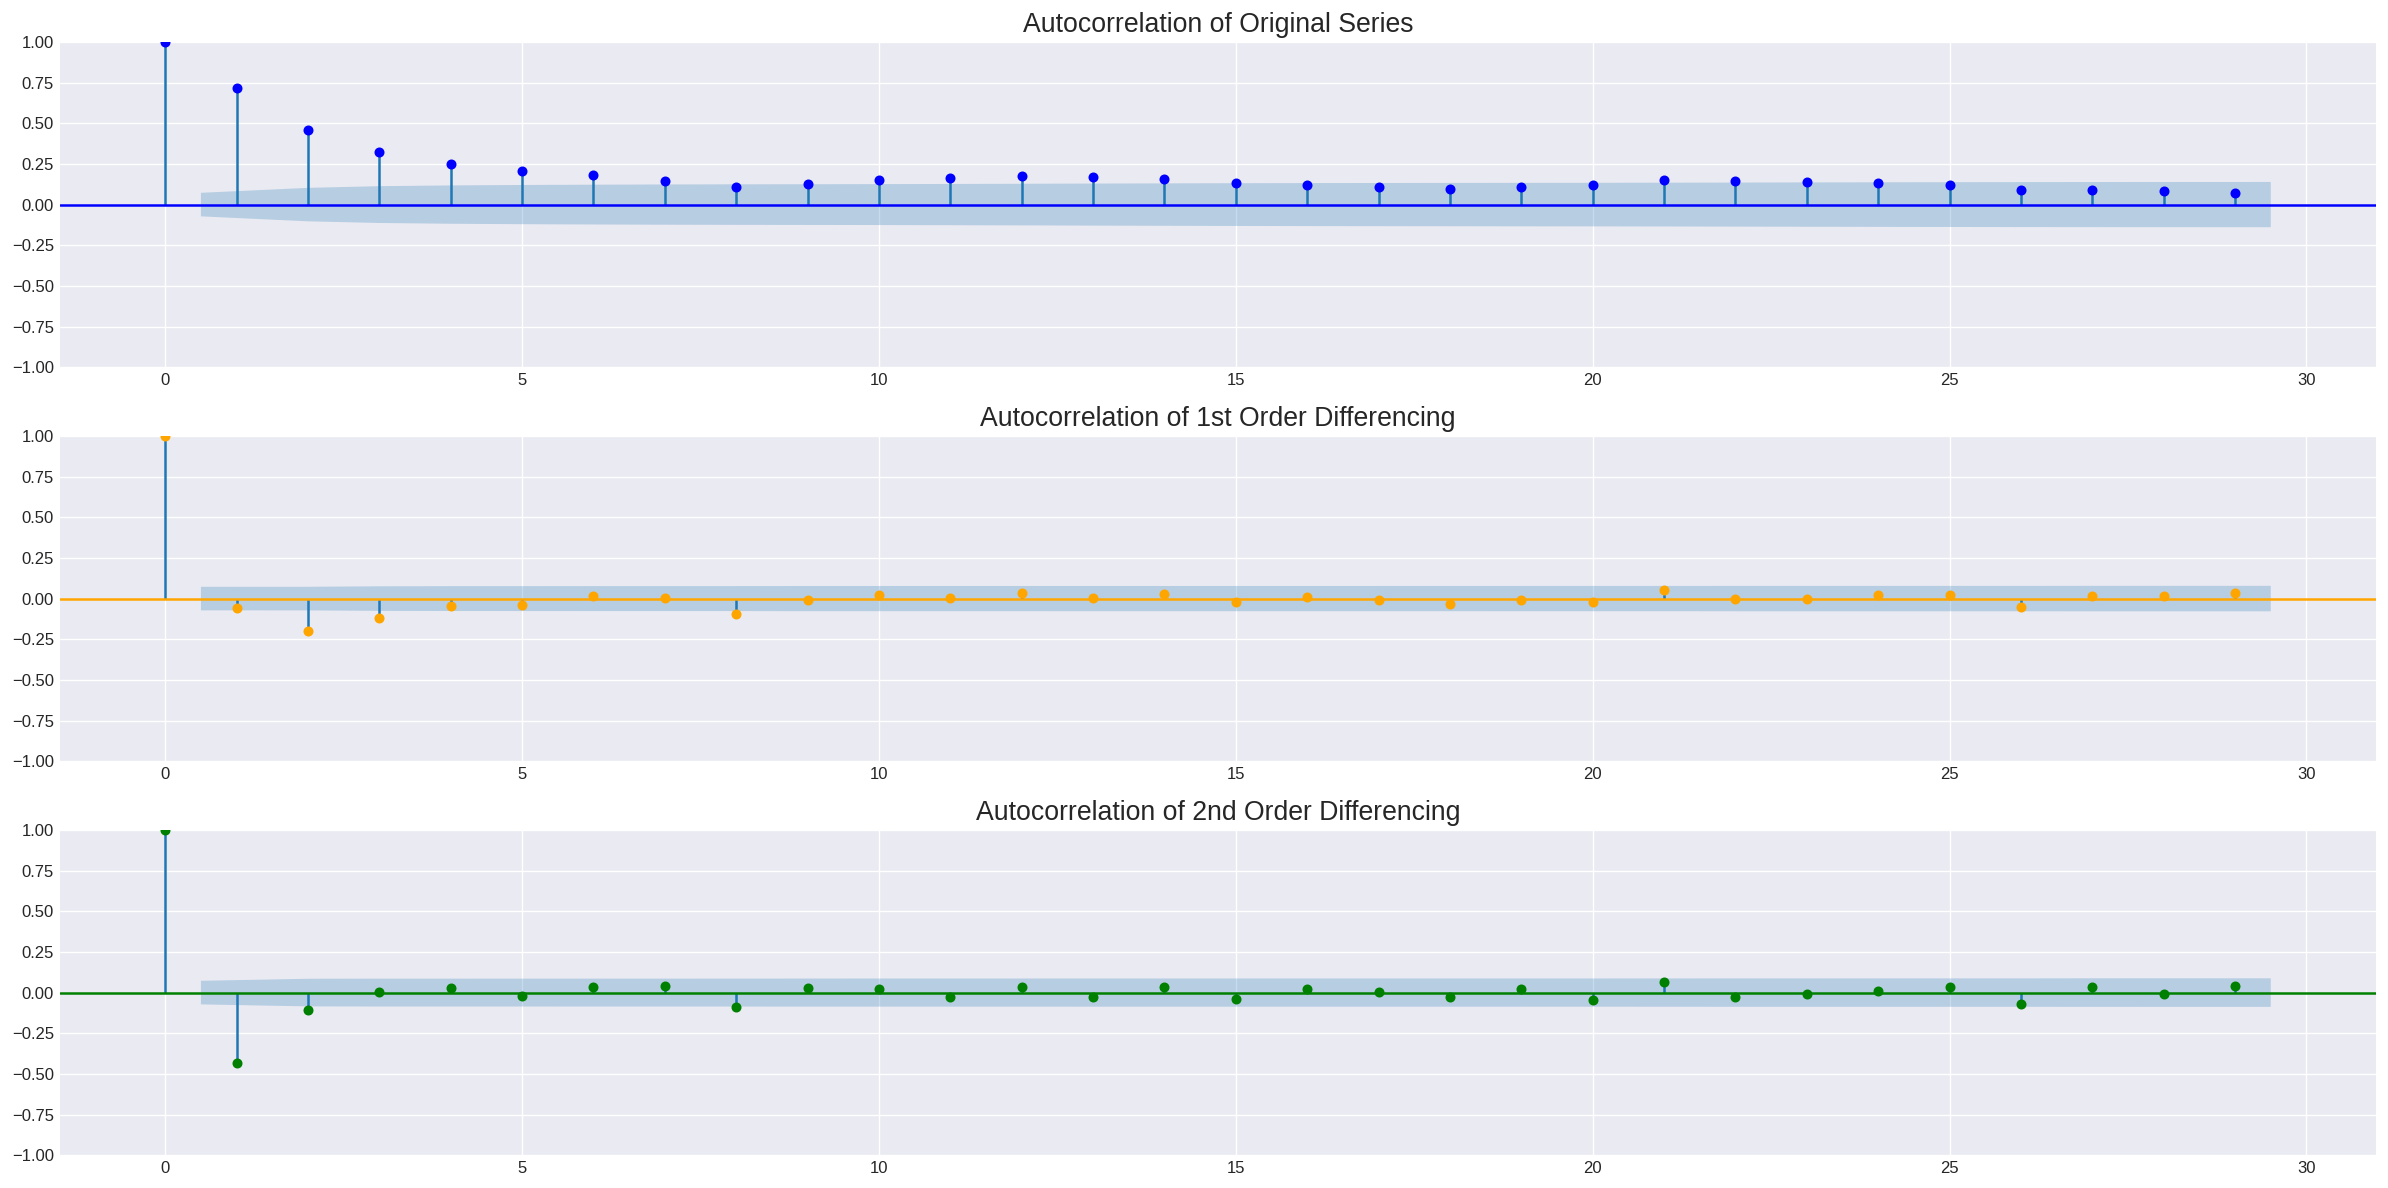

In [902]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Create subplots for the autocorrelation
fig, ax = plt.subplots(3, 1, figsize=(20, 10))

# Original series autocorrelation
fig = plot_acf(wind_power, ax=ax[0], color='blue')  # Original series in blue
ax[0].set_title('Autocorrelation of Original Series', fontsize=16)

# 1st Order Differencing autocorrelation
fig = plot_acf(wind_power.diff().dropna(), ax=ax[1], color='orange')  # 1st differencing in orange
ax[1].set_title('Autocorrelation of 1st Order Differencing', fontsize=16)

# 2nd Order Differencing autocorrelation
fig = plot_acf(wind_power.diff().diff().dropna(), ax=ax[2], color='green')  # 2nd differencing in green
ax[2].set_title('Autocorrelation of 2nd Order Differencing', fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()


#Finding order of the AR term

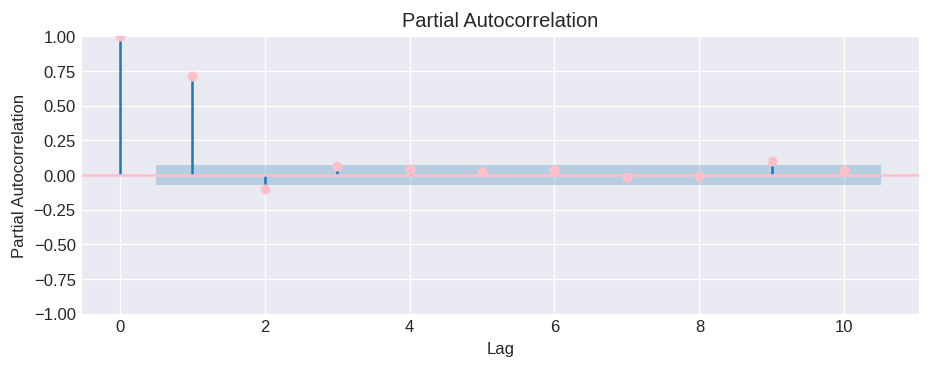

In [903]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})


plot_pacf(wind_power, lags=10,color='pink')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

p=2 looks like a good starting point based on the graph

#train and test split

In [904]:
wind_power.shape

(733,)

In [905]:
test_number = 274
train_w = wind_power[:-test_number]
test_w = wind_power[-test_number:]

In [906]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_s = SARIMAX(train_w, order=(3,0,5), seasonal_order=(3,0,5,12),
                enforce_stationarity=False,
                enforce_invertibility=False,
                trend="t") # order of _ for AR, 1 differentiation, and _ for MA
model_fit_s = model_s.fit(maxiter=2000)

print('Coefficients: %s' % model_fit_s.params)


Coefficients: drift       8.503892e-01
ar.L1       2.192408e+00
ar.L2      -2.030704e+00
ar.L3       7.831464e-01
ma.L1      -1.500814e+00
ma.L2       9.006978e-01
ma.L3       1.069794e-02
ma.L4       6.187335e-02
ma.L5      -2.291766e-01
ar.S.L12    9.833440e-02
ar.S.L24   -2.373247e-01
ar.S.L36    6.924787e-01
ma.S.L12   -1.136719e-02
ma.S.L24    2.747936e-01
ma.S.L36   -6.861415e-01
ma.S.L48   -3.735713e-02
ma.S.L60    6.411889e-02
sigma2      2.024741e+07
dtype: float64
